In [1]:
from pathlib import Path
import ntpath
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import cv2

%matplotlib inline

In [2]:
DATA_PATH = Path('../data/').resolve()
TRAIN_VIDEO = DATA_PATH/'train.mp4'
TEST_VIDEO = DATA_PATH/'test.mp4'
CLEAN_DATA_PATH = Path('../data/').resolve()


TRAIN_PATH = DATA_PATH/'train'
VAL_PATH = DATA_PATH/'val'
HOLDOUT_PATH = DATA_PATH/'holdout'
TEST_PATH = DATA_PATH/'test'

train_frames = 20400
test_frames = 10798

In [3]:
train_y = list(pd.read_csv(os.path.join(DATA_PATH, 'train.txt'), header=None, squeeze=True))
assert(len(train_y)==train_frames)

In [4]:
def dataset_constructor(video_loc, base_dir, dataset_name):
    img_folder = os.path.join(base_dir, 'images')
    os.makedirs(img_folder, exist_ok=True)
    meta_dict = {}
        
    vidcap = cv2.VideoCapture(str(video_loc))
    success,image = vidcap.read()
    idx = 0
    while success:
        img_path = os.path.join(img_folder, str(idx)+'.jpg')
        frame_speed = float('NaN') if dataset_name == 'test' else train_y[idx]
        meta_dict[idx] = [img_path, idx, frame_speed]
        cv2.imwrite(img_path, image)     # save frame as JPEG file      
        success,image = vidcap.read()
        idx += 1
    
    meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
    meta_df.columns = ['image_path', 'image_index', 'speed']
    
    
    print('writing meta to csv')
    meta_df.to_csv(os.path.join(base_dir, dataset_name+'_meta.csv'), index=False)
    
    return f'finished constructing {dataset_name}'

In [5]:
# train data
dataset_constructor(TRAIN_VIDEO, TRAIN_PATH, 'train')

writing meta to csv


'finished constructing train'

In [6]:
# test data
dataset_constructor(TEST_VIDEO, TEST_PATH, 'test')

writing meta to csv


'finished constructing test'

In [7]:
def validation_holdout_constructor(train_dir, train_df_name, val_dir, holdout_dir, val_size, holdout_size):
    """
    copies training images to val images folder
    adjusts the two dataframes accordingly.
    
    val_size is percent of training to make val.
    holdout_size is percent of training to make holdout.
    """
    if not(0 <= val_size + holdout_size <= 1):
        raise ValueError('invalid val_size and holdout_size')
        
    val_images = str(val_dir) + '/images/'
    holdout_images = str(holdout_dir) + '/images/'
    os.makedirs(val_images, exist_ok=True)
    os.makedirs(holdout_images, exist_ok=True)
    
    train_df = pd.read_csv(train_df_name)
    
    num_train = int(train_df.shape[0] * (1-val_size-holdout_size))
    num_val = int(train_df.shape[0] * val_size)
    num_holdout = int(train_df.shape[0] * holdout_size)
    
    train_indices = list(range(0, num_train))
    val_indices = list(range(num_train, num_train+num_val))
    holdout_indices = list(range(num_train+num_val, num_train+num_val+num_holdout))
    
    holdout_df = train_df.iloc[holdout_indices]
    val_df = train_df.iloc[val_indices]
    train_df = train_df.iloc[train_indices]
    
    sources = val_df['image_path'].values.copy()
    dests = val_images + val_df['image_path'].apply(ntpath.basename).values
    val_df['image_path'] = dests
    assert(len(sources) == len(dests))
    for i in range(len(sources)):
        shutil.move(sources[i], dests[i])
        
    sources = holdout_df['image_path'].values.copy()
    dests = holdout_images + holdout_df['image_path'].apply(ntpath.basename).values
    holdout_df['image_path'] = dests
    assert(len(sources) == len(dests))
    for i in range(len(sources)):
        shutil.move(sources[i], dests[i])
    
    train_df.to_csv(train_df_name, index=False)
    val_df.to_csv(os.path.join(val_dir, 'val_meta.csv'), index=False)
    holdout_df.to_csv(os.path.join(holdout_dir, 'holdout_meta.csv'), index=False)

In [8]:
# val data
validation_holdout_constructor(TRAIN_PATH, TRAIN_PATH/'train_meta.csv', VAL_PATH, HOLDOUT_PATH, 0.2, 0.1)

In [9]:
train_meta = pd.read_csv(TRAIN_PATH/'train_meta.csv')
val_meta = pd.read_csv(VAL_PATH/'val_meta.csv')
holdout_meta = pd.read_csv(HOLDOUT_PATH/'holdout_meta.csv')
assert(train_meta.shape[1] == 3)
assert(train_meta.shape[0] + val_meta.shape[0] + holdout_meta.shape[0] == train_frames)
train_meta.head()

image_path  image_index      speed
0  /home/jared/Research/speed_detection/data/trai...            0  28.105569
1  /home/jared/Research/speed_detection/data/trai...            1  28.105569
2  /home/jared/Research/speed_detection/data/trai...            2  28.106527
3  /home/jared/Research/speed_detection/data/trai...            3  28.130404
4  /home/jared/Research/speed_detection/data/trai...            4  28.109243

speed: 28.105569
shape: (480, 640, 3)


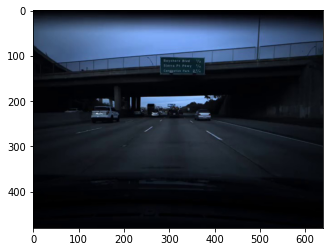

speed: 28.105569
shape: (480, 640, 3)


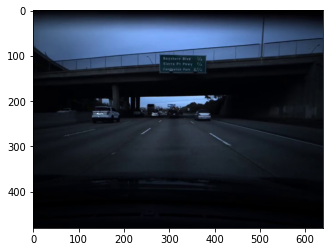

speed: 28.106527000000003
shape: (480, 640, 3)


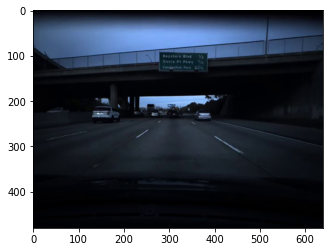

speed: 28.130404
shape: (480, 640, 3)


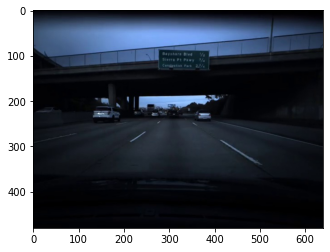

speed: 28.109243
shape: (480, 640, 3)


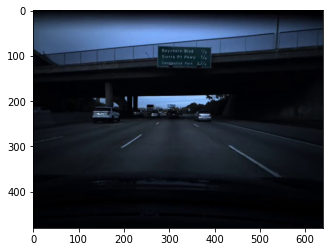

speed: 28.088571999999996
shape: (480, 640, 3)


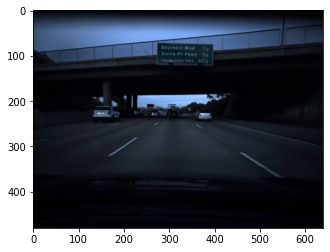

speed: 28.034211
shape: (480, 640, 3)


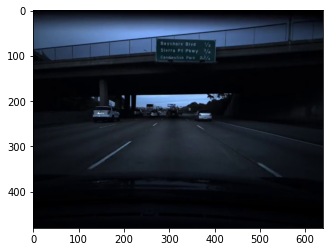

speed: 28.018490999999997
shape: (480, 640, 3)


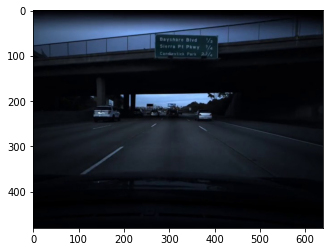

speed: 27.986624
shape: (480, 640, 3)


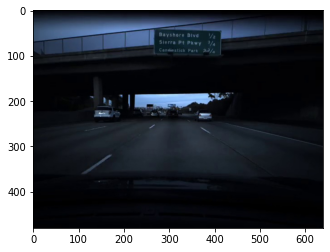

speed: 28.016352
shape: (480, 640, 3)


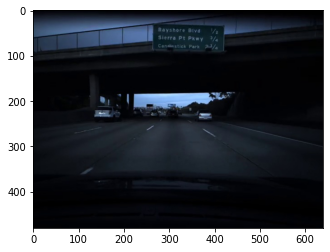

speed: 27.981986
shape: (480, 640, 3)


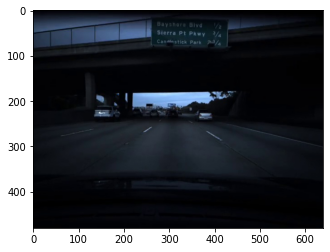

speed: 27.978625
shape: (480, 640, 3)


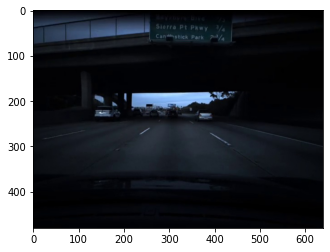

speed: 28.032331
shape: (480, 640, 3)


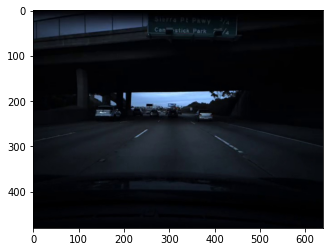

speed: 27.960219
shape: (480, 640, 3)


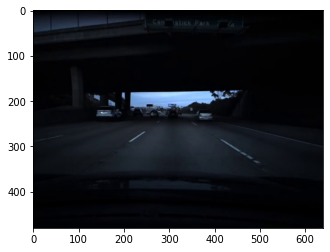

speed: 27.93717800000001
shape: (480, 640, 3)


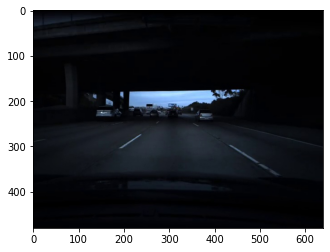

speed: 27.940599
shape: (480, 640, 3)


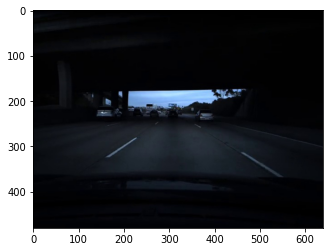

speed: 27.908579
shape: (480, 640, 3)


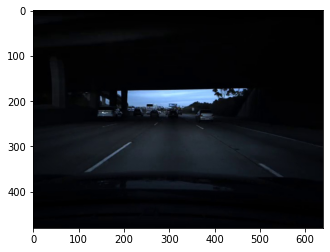

speed: 27.898606
shape: (480, 640, 3)


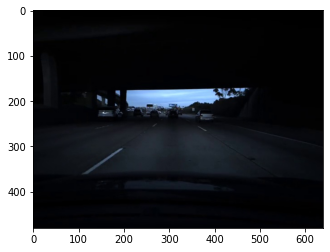

speed: 27.855982
shape: (480, 640, 3)


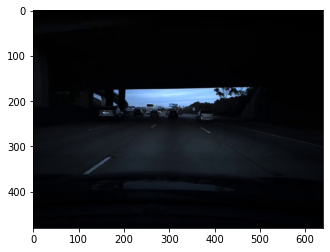

speed: 27.795581
shape: (480, 640, 3)


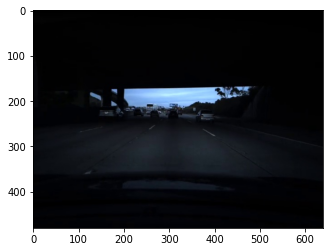

In [10]:
for i in range(20):
    print('speed:',train_meta['speed'][i] )
    img=mpimg.imread(train_meta['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

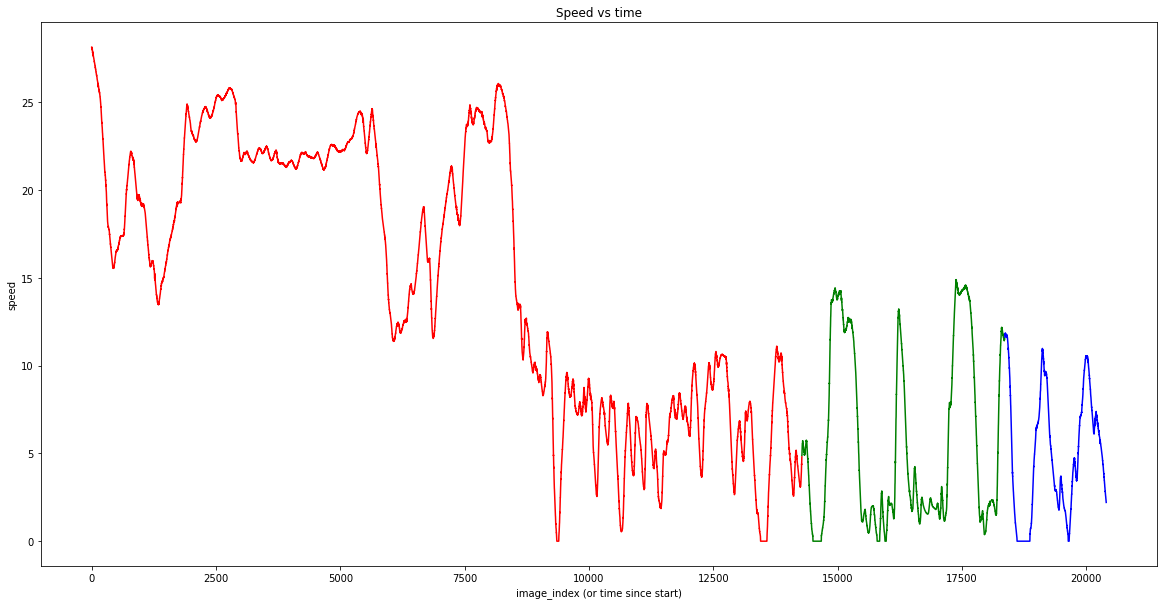

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(train_meta['speed'], color='r')
plt.plot(list(range(len(train_meta), len(train_meta) + len(val_meta))), 
         val_meta['speed'].values, color='g')
plt.plot(list(range(len(train_meta) + len(val_meta), len(train_meta) + len(val_meta) + len(holdout_meta))), 
         holdout_meta['speed'].values, color='b')
plt.xlabel('image_index (or time since start)')
plt.ylabel('speed')
plt.title('Speed vs time')
plt.show()

In [12]:
len(train_meta)

14280

In [13]:
len(val_meta)

4080

In [14]:
len(holdout_meta)

2040

In [15]:
test_meta = pd.read_csv(os.path.join(TEST_PATH, 'test_meta.csv'))
assert(test_meta.shape[0] == test_frames)
assert(test_meta.shape[1] == 3)
test_meta.head()

image_path  image_index  speed
0  /home/jared/Research/speed_detection/data/test...            0    NaN
1  /home/jared/Research/speed_detection/data/test...            1    NaN
2  /home/jared/Research/speed_detection/data/test...            2    NaN
3  /home/jared/Research/speed_detection/data/test...            3    NaN
4  /home/jared/Research/speed_detection/data/test...            4    NaN

speed: nan
shape: (480, 640, 3)


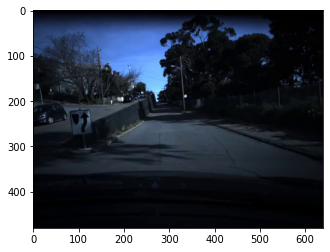

speed: nan
shape: (480, 640, 3)


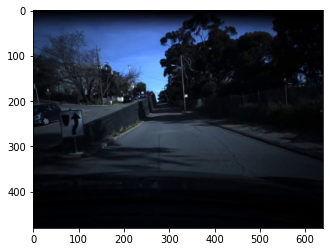

speed: nan
shape: (480, 640, 3)


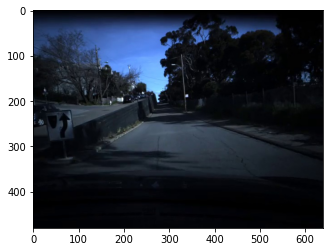

speed: nan
shape: (480, 640, 3)


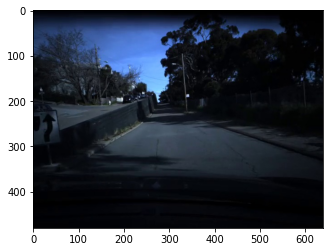

speed: nan
shape: (480, 640, 3)


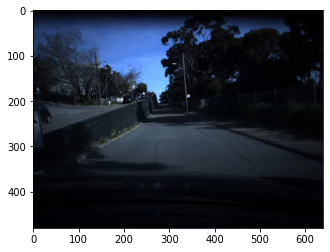

speed: nan
shape: (480, 640, 3)


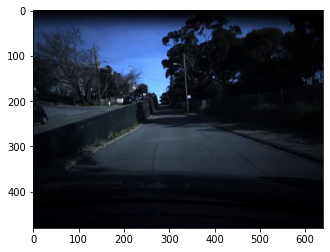

speed: nan
shape: (480, 640, 3)


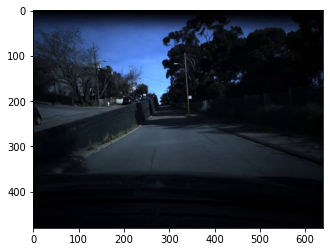

speed: nan
shape: (480, 640, 3)


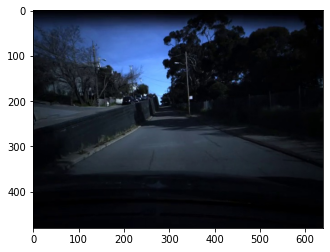

speed: nan
shape: (480, 640, 3)


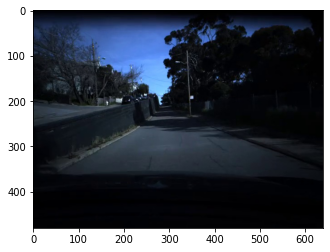

speed: nan
shape: (480, 640, 3)


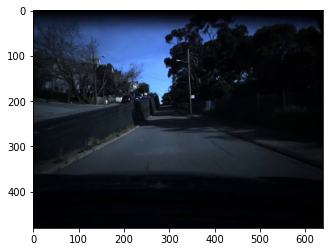

speed: nan
shape: (480, 640, 3)


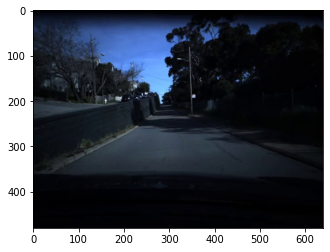

speed: nan
shape: (480, 640, 3)


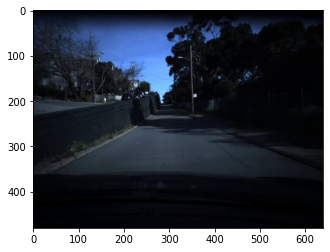

speed: nan
shape: (480, 640, 3)


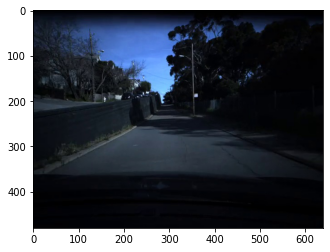

speed: nan
shape: (480, 640, 3)


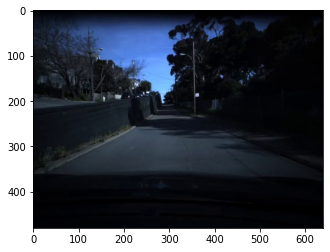

speed: nan
shape: (480, 640, 3)


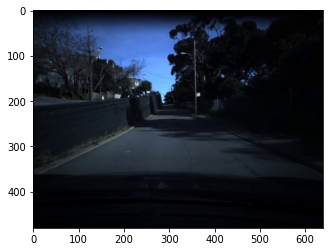

speed: nan
shape: (480, 640, 3)


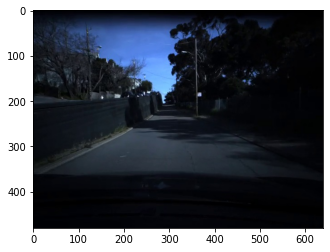

speed: nan
shape: (480, 640, 3)


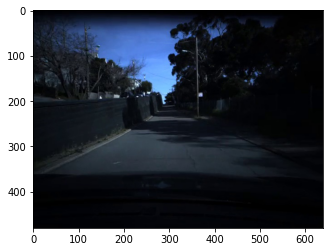

speed: nan
shape: (480, 640, 3)


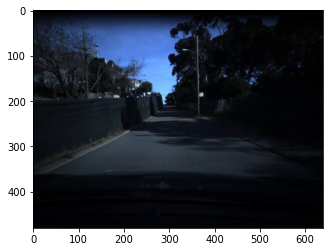

speed: nan
shape: (480, 640, 3)


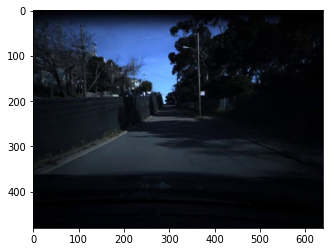

speed: nan
shape: (480, 640, 3)


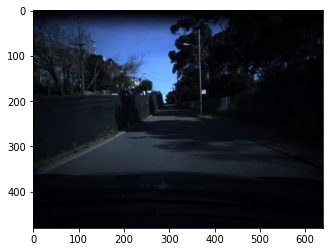

In [16]:
for i in range(20):
    print('speed:',test_meta['speed'][i] )
    img=mpimg.imread(test_meta['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

# Road Segmentation

We also segment the road from the rest of the image, and save these resulting images. We use a popular PyTorch library, https://github.com/CSAILVision/semantic-segmentation-pytorch.

In [17]:
# System libs
import os
import argparse
from distutils.version import LooseVersion
# Numerical libs
import numpy as np
import torch
import torch.nn as nn
from scipy.io import loadmat
import csv
# Our libs
from mit_semseg.dataset import TestDataset
from mit_semseg.models import ModelBuilder, SegmentationModule
from mit_semseg.utils import colorEncode, find_recursive, setup_logger
from mit_semseg.lib.nn import user_scattered_collate, async_copy_to
from mit_semseg.lib.utils import as_numpy
from PIL import Image
from tqdm import tqdm
from mit_semseg.config import cfg

import ntpath
import cv2
import matplotlib.pyplot as plt

In [18]:
colors = loadmat(str(Path('../source/segmentation_config/color150.mat').resolve()))['colors']
names = {}
with open(str(Path('../source/segmentation_config/object150_info.csv').resolve())) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        names[int(row[0])] = row[5].split(";")[0]


def visualize_result(data, pred, cfg):
    (img, info) = data

    # print predictions in descending order
    pred = np.int32(pred)
    pixs = pred.size
    uniques, counts = np.unique(pred, return_counts=True)
    print("Predictions in [{}]:".format(info))
    for idx in np.argsort(counts)[::-1]:
        name = names[uniques[idx] + 1]
        ratio = counts[idx] / pixs * 100
        if ratio > 0.1:
            print("  {}: {:.2f}%".format(name, ratio))

    # colorize prediction
    pred_color = colorEncode(pred, colors).astype(np.uint8)

    # aggregate images and save
    im_vis = np.concatenate((img, pred_color), axis=1)

    img_name = info.split('/')[-1]
    Image.fromarray(im_vis).save(
        os.path.join(cfg.TEST.result, img_name.replace('.jpg', '.png')))


def test(segmentation_module, loader, gpu, save_path):
    segmentation_module.eval()

    pbar = tqdm(total=len(loader))
    for batch_data in loader:
        # process data
        batch_data = batch_data[0]
        segSize = (batch_data['img_ori'].shape[0],
                   batch_data['img_ori'].shape[1])
        img_resized_list = batch_data['img_data']

        with torch.no_grad():
            scores = torch.zeros(1, cfg.DATASET.num_class, segSize[0], segSize[1])
            scores = async_copy_to(scores, gpu)

            for img in img_resized_list:
                feed_dict = batch_data.copy()
                feed_dict['img_data'] = img
                del feed_dict['img_ori']
                del feed_dict['info']
                feed_dict = async_copy_to(feed_dict, gpu)

                # forward pass
                pred_tmp = segmentation_module(feed_dict, segSize=segSize)
                scores = scores + pred_tmp / len(cfg.DATASET.imgSizes)

            _, pred = torch.max(scores, dim=1)
            pred = as_numpy(pred.squeeze(0).cpu())

        img = batch_data['img_ori']
        img[pred != 6] = 0
        base = ntpath.basename(batch_data['info'])
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(save_path + base, img)
        # visualization
        pred 
        pbar.update(1)


def main(cfg, gpu, save_path):
    torch.cuda.set_device(gpu)

    # Network Builders
    net_encoder = ModelBuilder.build_encoder(
        arch=cfg.MODEL.arch_encoder,
        fc_dim=cfg.MODEL.fc_dim,
        weights=cfg.MODEL.weights_encoder)
    net_decoder = ModelBuilder.build_decoder(
        arch=cfg.MODEL.arch_decoder,
        fc_dim=cfg.MODEL.fc_dim,
        num_class=cfg.DATASET.num_class,
        weights=cfg.MODEL.weights_decoder,
        use_softmax=True)

    crit = nn.NLLLoss(ignore_index=-1)

    segmentation_module = SegmentationModule(net_encoder, net_decoder, crit)

    # Dataset and Loader
    dataset_test = TestDataset(
        cfg.list_test,
        cfg.DATASET)
    loader_test = torch.utils.data.DataLoader(
        dataset_test,
        batch_size=cfg.TEST.batch_size,
        shuffle=False,
        collate_fn=user_scattered_collate,
        num_workers=5,
        drop_last=True)

    segmentation_module.cuda()

    # Main loop
    test(segmentation_module, loader_test, gpu, save_path)

    print('Inference done!')

In [19]:
def run():
    assert args.imgs != None
    assert args.save_path != None
    args.imgs = str(Path(args.imgs).resolve()) + '/'
    args.save_path = str(Path(args.save_path).resolve()) + '/'
    args.cfg = str(Path(args.cfg).resolve())
    os.makedirs(args.save_path, exist_ok=True)

    cfg.merge_from_file(args.cfg)

    logger = setup_logger(distributed_rank=0)   # TODO
    logger.info("Loaded configuration file {}".format(args.cfg))
    logger.info("Running with config:\n{}".format(cfg))

    cfg.MODEL.arch_encoder = cfg.MODEL.arch_encoder.lower()
    cfg.MODEL.arch_decoder = cfg.MODEL.arch_decoder.lower()
    cfg.BASE_DIR = ntpath.dirname(args.cfg)

    # absolute paths of model weights
    cfg.MODEL.weights_encoder = os.path.join(*[cfg.BASE_DIR, cfg.DIR, 'encoder_'+cfg.TEST.checkpoint])
    cfg.MODEL.weights_decoder = os.path.join(*[cfg.BASE_DIR, cfg.DIR, 'decoder_'+cfg.TEST.checkpoint])

    assert os.path.exists(cfg.MODEL.weights_encoder) and \
        os.path.exists(cfg.MODEL.weights_decoder), "checkpoint does not exitst!"

    # generate testing image list
    if os.path.isdir(args.imgs):
        imgs = find_recursive(args.imgs)
    else:
        imgs = [args.imgs]
    assert len(imgs), "imgs should be a path to image (.jpg) or directory."
    cfg.list_test = [{'fpath_img': x} for x in imgs]

    if not os.path.isdir(cfg.TEST.result):
        os.makedirs(cfg.TEST.result)

    main(cfg, args.gpu, args.save_path)

In [20]:
class Args(object):
    imgs = None
    save_path = None
    cfg = '../source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml'
    gpu = 0
    opts = None
    
args = Args()

In [21]:
#make training segmentation
args.imgs = '../data/train/images/'
args.save_path = '../data/train/mask_road_images/'

run()

[2020-12-14 20:34:36,842 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 20:34:36,843 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: 
  weights_encoder: 
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: ./
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  fix_bn: False
  lr_decoder: 0.02
  lr_encoder: 0.02
  lr_pow: 0.9
  num_epoch: 20
  optim: SGD
  seed: 304
  start_

100%|██████████| 14280/14280 [1:13:41<00:00,  3.41it/s]

Inference done!


In [22]:
#make validation segmentation
args.imgs = '../data/val/images/'
args.save_path = '../data/val/mask_road_images/'

run()

[2020-12-14 21:48:21,728 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 21:48:21,728 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 21:48:21,740 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: /home/jared/Research/

[2020-12-14 21:48:21,740 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth
  weights_encoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: ./
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  

Loading weights for net_encoder



  0%|          | 0/4080 [00:00<?, ?it/s]

Loading weights for net_decoder
# samples: 4080



  4%|▍         | 153/4080 [00:47<20:19,  3.22it/s]


  7%|▋         | 304/4080 [01:34<19:15,  3.27it/s]


 11%|█         | 455/4080 [02:21<18:07,  3.33it/s]


 15%|█▍        | 606/4080 [03:08<18:49,  3.08it/s]


 19%|█▊        | 757/4080 [03:55<18:08,  3.05it/s]


 22%|██▏       | 908/4080 [04:43<16:21,  3.23it/s]


 26%|██▌       | 1058/4080 [05:29<15:39,  3.22it/s]


 30%|██▉       | 1206/4080 [06:16<15:48,  3.03it/s]


 33%|███▎      | 1354/4080 [07:02<13:45,  3.30it/s]


 37%|███▋      | 1502/4080 [07:48<13:49,  3.11it/s]


 40%|████      | 1650/4080 [08:34<12:05,  3.35it/s]


 44%|████▍     | 1798/4080 [09:20<11:56,  3.18it/s]


 48%|████▊     | 1946/4080 [10:07<11:48,  3.01it/s]


 51%|█████▏    | 2094/4080 [10:53<10:10,  3.25it/s]


 55%|█████▍    | 2242/4080 [11:39<09:54,  3.09it/s]


 59%|█████▊    | 2390/4080 [12:25<08:16,  3.40it/s]


 62%|██████▏   | 2538/4080 [13:12<07:54,  3.25it/s]


 66%|██████▌   | 2686/4080 [13:58<07:39,  3.03it/s]


 69%|██████▉   | 2834/4080 [14:44<06:20,  3.27it/s]


 73%|███████▎  | 2982/4080 [15:30<05:50,  3.14it/s]


 77%|███████▋  | 3130/4080 [16:16<04:44,  3.34it/s]


 80%|████████  | 3278/4080 [17:03<04:13,  3.17it/s]


 84%|████████▍ | 3426/4080 [17:49<03:29,  3.12it/s]


 88%|████████▊ | 3574/4080 [18:35<02:33,  3.29it/s]


 91%|█████████ | 3722/4080 [19:21<01:54,  3.12it/s]


 95%|█████████▍| 3870/4080 [20:08<01:02,  3.35it/s]


 98%|█████████▊| 4018/4080 [20:54<00:19,  3.25it/s]


100%|██████████| 4080/4080 [21:13<00:00,  3.44it/s]

Inference done!


In [23]:
#make holdout segmentation
args.imgs = '../data/holdout/images/'
args.save_path = '../data/holdout/mask_road_images/'

run()

[2020-12-14 22:09:36,272 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 22:09:36,272 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 22:09:36,272 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 22:09:36,278 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_datas

[2020-12-14 22:09:36,278 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth
  weights_encoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: ./
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  

[2020-12-14 22:09:36,278 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth
  weights_encoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: ./
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  

Loading weights for net_encoder




  0%|          | 0/2040 [00:00<?, ?it/s]

Loading weights for net_decoder
# samples: 2040




  0%|          | 1/2040 [00:00<18:14,  1.86it/s]

  0%|          | 2/2040 [00:00<15:59,  2.12it/s]

  0%|          | 3/2040 [00:01<14:39,  2.32it/s]

  0%|          | 4/2040 [00:01<13:46,  2.46it/s]

  0%|          | 5/2040 [00:01<12:47,  2.65it/s]

  0%|          | 6/2040 [00:02<12:06,  2.80it/s]

  0%|          | 7/2040 [00:02<11:41,  2.90it/s]

  0%|          | 8/2040 [00:02<11:18,  2.99it/s]

  0%|          | 9/2040 [00:03<11:02,  3.07it/s]

  0%|          | 10/2040 [00:03<10:45,  3.15it/s]

  1%|          | 11/2040 [00:03<10:39,  3.17it/s]

  1%|          | 12/2040 [00:04<10:34,  3.20it/s]

  1%|          | 13/2040 [00:04<10:27,  3.23it/s]

  1%|          | 14/2040 [00:04<10:28,  3.23it/s]

  1%|          | 15/2040 [00:04<10:18,  3.28it/s]

  1%|          | 16/2040 [00:05<10:13,  3.30it/s]

  1%|          | 17/2040 [00:05<10:11,  3.31it/s]

  1%|          | 18/2040 [00:05<10:09,  3.32it/s]

  1%|          | 19/2040 [00:06<10:12,  3.30it/s]

  1%|          | 20/2040 [00:06<10:10,

  7%|▋         | 144/2040 [00:44<09:55,  3.18it/s]

  7%|▋         | 145/2040 [00:45<09:54,  3.19it/s]

  7%|▋         | 146/2040 [00:45<09:55,  3.18it/s]

  7%|▋         | 147/2040 [00:45<09:53,  3.19it/s]

  7%|▋         | 148/2040 [00:46<09:51,  3.20it/s]

  7%|▋         | 149/2040 [00:46<09:53,  3.19it/s]

  7%|▋         | 150/2040 [00:46<09:46,  3.22it/s]

  7%|▋         | 151/2040 [00:47<09:41,  3.25it/s]

  7%|▋         | 152/2040 [00:47<09:47,  3.21it/s]

  8%|▊         | 153/2040 [00:47<09:48,  3.21it/s]

  8%|▊         | 154/2040 [00:48<09:56,  3.16it/s]

  8%|▊         | 155/2040 [00:48<09:51,  3.19it/s]

  8%|▊         | 156/2040 [00:48<09:44,  3.22it/s]

  8%|▊         | 157/2040 [00:48<09:47,  3.20it/s]

  8%|▊         | 158/2040 [00:49<09:47,  3.20it/s]

  8%|▊         | 159/2040 [00:49<09:48,  3.19it/s]

  8%|▊         | 160/2040 [00:49<09:42,  3.22it/s]

  8%|▊         | 161/2040 [00:50<09:43,  3.22it/s]

  8%|▊         | 162/2040 [00:50<09:36,  3.26it/s]

  8%|▊      

 14%|█▍        | 285/2040 [01:28<09:05,  3.22it/s]

 14%|█▍        | 286/2040 [01:29<09:06,  3.21it/s]

 14%|█▍        | 287/2040 [01:29<09:08,  3.19it/s]

 14%|█▍        | 288/2040 [01:29<09:04,  3.22it/s]

 14%|█▍        | 289/2040 [01:30<09:05,  3.21it/s]

 14%|█▍        | 290/2040 [01:30<09:04,  3.22it/s]

 14%|█▍        | 291/2040 [01:30<09:04,  3.21it/s]

 14%|█▍        | 292/2040 [01:30<09:05,  3.21it/s]

 14%|█▍        | 293/2040 [01:31<09:06,  3.19it/s]

 14%|█▍        | 294/2040 [01:31<09:04,  3.20it/s]

 14%|█▍        | 295/2040 [01:31<09:05,  3.20it/s]

 15%|█▍        | 296/2040 [01:32<09:04,  3.21it/s]

 15%|█▍        | 297/2040 [01:32<09:04,  3.20it/s]

 15%|█▍        | 298/2040 [01:32<09:07,  3.18it/s]

 15%|█▍        | 299/2040 [01:33<09:05,  3.19it/s]

 15%|█▍        | 300/2040 [01:33<09:04,  3.20it/s]

 15%|█▍        | 301/2040 [01:33<09:03,  3.20it/s]

 15%|█▍        | 302/2040 [01:34<09:04,  3.19it/s]

 15%|█▍        | 303/2040 [01:34<09:03,  3.20it/s]

 15%|█▍     

 21%|██        | 426/2040 [02:12<08:23,  3.21it/s]

 21%|██        | 427/2040 [02:13<08:23,  3.20it/s]

 21%|██        | 428/2040 [02:13<08:19,  3.23it/s]

 21%|██        | 429/2040 [02:13<08:22,  3.21it/s]

 21%|██        | 430/2040 [02:13<08:23,  3.20it/s]

 21%|██        | 431/2040 [02:14<08:25,  3.18it/s]

 21%|██        | 432/2040 [02:14<08:19,  3.22it/s]

 21%|██        | 433/2040 [02:14<08:20,  3.21it/s]

 21%|██▏       | 434/2040 [02:15<08:24,  3.18it/s]

 21%|██▏       | 435/2040 [02:15<08:21,  3.20it/s]

 21%|██▏       | 436/2040 [02:15<08:27,  3.16it/s]

 21%|██▏       | 437/2040 [02:16<08:21,  3.20it/s]

 21%|██▏       | 438/2040 [02:16<08:23,  3.18it/s]

 22%|██▏       | 439/2040 [02:16<08:24,  3.17it/s]

 22%|██▏       | 440/2040 [02:17<08:25,  3.16it/s]

 22%|██▏       | 441/2040 [02:17<08:27,  3.15it/s]

 22%|██▏       | 442/2040 [02:17<08:25,  3.16it/s]

 22%|██▏       | 443/2040 [02:18<08:23,  3.17it/s]

 22%|██▏       | 444/2040 [02:18<08:24,  3.16it/s]

 22%|██▏    

 28%|██▊       | 567/2040 [02:56<07:39,  3.21it/s]

 28%|██▊       | 568/2040 [02:56<07:39,  3.20it/s]

 28%|██▊       | 569/2040 [02:57<07:44,  3.17it/s]

 28%|██▊       | 570/2040 [02:57<07:45,  3.16it/s]

 28%|██▊       | 571/2040 [02:57<07:44,  3.17it/s]

 28%|██▊       | 572/2040 [02:58<07:48,  3.13it/s]

 28%|██▊       | 573/2040 [02:58<07:47,  3.14it/s]

 28%|██▊       | 574/2040 [02:58<07:43,  3.16it/s]

 28%|██▊       | 575/2040 [02:59<07:37,  3.20it/s]

 28%|██▊       | 576/2040 [02:59<07:34,  3.22it/s]

 28%|██▊       | 577/2040 [02:59<07:31,  3.24it/s]

 28%|██▊       | 578/2040 [03:00<07:32,  3.23it/s]

 28%|██▊       | 579/2040 [03:00<07:33,  3.22it/s]

 28%|██▊       | 580/2040 [03:00<07:35,  3.21it/s]

 28%|██▊       | 581/2040 [03:00<07:31,  3.23it/s]

 29%|██▊       | 582/2040 [03:01<07:35,  3.20it/s]

 29%|██▊       | 583/2040 [03:01<07:27,  3.26it/s]

 29%|██▊       | 584/2040 [03:01<07:22,  3.29it/s]

 29%|██▊       | 585/2040 [03:02<07:17,  3.33it/s]

 29%|██▊    

 35%|███▍      | 708/2040 [03:40<06:50,  3.24it/s]

 35%|███▍      | 709/2040 [03:40<06:50,  3.25it/s]

 35%|███▍      | 710/2040 [03:41<06:51,  3.23it/s]

 35%|███▍      | 711/2040 [03:41<06:49,  3.25it/s]

 35%|███▍      | 712/2040 [03:41<06:53,  3.21it/s]

 35%|███▍      | 713/2040 [03:42<06:55,  3.19it/s]

 35%|███▌      | 714/2040 [03:42<06:51,  3.22it/s]

 35%|███▌      | 715/2040 [03:42<06:47,  3.25it/s]

 35%|███▌      | 716/2040 [03:42<06:49,  3.23it/s]

 35%|███▌      | 717/2040 [03:43<06:50,  3.22it/s]

 35%|███▌      | 718/2040 [03:43<06:51,  3.21it/s]

 35%|███▌      | 719/2040 [03:43<06:52,  3.21it/s]

 35%|███▌      | 720/2040 [03:44<06:52,  3.20it/s]

 35%|███▌      | 721/2040 [03:44<06:51,  3.21it/s]

 35%|███▌      | 722/2040 [03:44<06:48,  3.23it/s]

 35%|███▌      | 723/2040 [03:45<06:46,  3.24it/s]

 35%|███▌      | 724/2040 [03:45<06:50,  3.20it/s]

 36%|███▌      | 725/2040 [03:45<06:51,  3.20it/s]

 36%|███▌      | 726/2040 [03:46<06:48,  3.21it/s]

 36%|███▌   

 42%|████▏     | 849/2040 [04:24<06:08,  3.23it/s]

 42%|████▏     | 850/2040 [04:24<06:05,  3.25it/s]

 42%|████▏     | 851/2040 [04:24<06:04,  3.26it/s]

 42%|████▏     | 852/2040 [04:25<06:06,  3.24it/s]

 42%|████▏     | 853/2040 [04:25<06:03,  3.27it/s]

 42%|████▏     | 854/2040 [04:25<06:06,  3.23it/s]

 42%|████▏     | 855/2040 [04:26<06:11,  3.19it/s]

 42%|████▏     | 856/2040 [04:26<06:10,  3.20it/s]

 42%|████▏     | 857/2040 [04:26<06:09,  3.20it/s]

 42%|████▏     | 858/2040 [04:27<06:09,  3.20it/s]

 42%|████▏     | 859/2040 [04:27<06:09,  3.19it/s]

 42%|████▏     | 860/2040 [04:27<06:08,  3.20it/s]

 42%|████▏     | 861/2040 [04:28<06:08,  3.20it/s]

 42%|████▏     | 862/2040 [04:28<06:09,  3.19it/s]

 42%|████▏     | 863/2040 [04:28<06:04,  3.23it/s]

 42%|████▏     | 864/2040 [04:29<06:05,  3.22it/s]

 42%|████▏     | 865/2040 [04:29<06:02,  3.24it/s]

 42%|████▏     | 866/2040 [04:29<06:06,  3.20it/s]

 42%|████▎     | 867/2040 [04:29<06:06,  3.20it/s]

 43%|████▎  

 49%|████▊     | 990/2040 [05:08<05:21,  3.26it/s]

 49%|████▊     | 991/2040 [05:08<05:24,  3.23it/s]

 49%|████▊     | 992/2040 [05:08<05:27,  3.20it/s]

 49%|████▊     | 993/2040 [05:09<05:24,  3.23it/s]

 49%|████▊     | 994/2040 [05:09<05:24,  3.22it/s]

 49%|████▉     | 995/2040 [05:09<05:20,  3.26it/s]

 49%|████▉     | 996/2040 [05:10<05:22,  3.24it/s]

 49%|████▉     | 997/2040 [05:10<05:21,  3.25it/s]

 49%|████▉     | 998/2040 [05:10<05:23,  3.22it/s]

 49%|████▉     | 999/2040 [05:11<05:25,  3.19it/s]

 49%|████▉     | 1000/2040 [05:11<05:30,  3.14it/s]

 49%|████▉     | 1001/2040 [05:11<05:27,  3.17it/s]

 49%|████▉     | 1002/2040 [05:11<05:24,  3.20it/s]

 49%|████▉     | 1003/2040 [05:12<05:23,  3.21it/s]

 49%|████▉     | 1004/2040 [05:12<05:20,  3.24it/s]

 49%|████▉     | 1005/2040 [05:12<05:21,  3.22it/s]

 49%|████▉     | 1006/2040 [05:13<05:18,  3.25it/s]

 49%|████▉     | 1007/2040 [05:13<05:22,  3.20it/s]

 49%|████▉     | 1008/2040 [05:13<05:24,  3.18it/s]

 49

 55%|█████▌    | 1129/2040 [05:51<04:44,  3.21it/s]

 55%|█████▌    | 1130/2040 [05:51<04:42,  3.22it/s]

 55%|█████▌    | 1131/2040 [05:52<04:44,  3.20it/s]

 55%|█████▌    | 1132/2040 [05:52<04:45,  3.18it/s]

 56%|█████▌    | 1133/2040 [05:52<04:44,  3.19it/s]

 56%|█████▌    | 1134/2040 [05:53<04:44,  3.19it/s]

 56%|█████▌    | 1135/2040 [05:53<04:43,  3.19it/s]

 56%|█████▌    | 1136/2040 [05:53<04:44,  3.17it/s]

 56%|█████▌    | 1137/2040 [05:54<04:43,  3.18it/s]

 56%|█████▌    | 1138/2040 [05:54<04:41,  3.20it/s]

 56%|█████▌    | 1139/2040 [05:54<04:41,  3.20it/s]

 56%|█████▌    | 1140/2040 [05:54<04:42,  3.18it/s]

 56%|█████▌    | 1141/2040 [05:55<04:39,  3.22it/s]

 56%|█████▌    | 1142/2040 [05:55<04:39,  3.22it/s]

 56%|█████▌    | 1143/2040 [05:55<04:40,  3.20it/s]

 56%|█████▌    | 1144/2040 [05:56<04:35,  3.25it/s]

 56%|█████▌    | 1145/2040 [05:56<04:35,  3.25it/s]

 56%|█████▌    | 1146/2040 [05:56<04:33,  3.27it/s]

 56%|█████▌    | 1147/2040 [05:57<04:34,  3.25

 62%|██████▏   | 1267/2040 [06:34<03:59,  3.23it/s]

 62%|██████▏   | 1268/2040 [06:34<04:00,  3.21it/s]

 62%|██████▏   | 1269/2040 [06:35<04:00,  3.20it/s]

 62%|██████▏   | 1270/2040 [06:35<04:00,  3.20it/s]

 62%|██████▏   | 1271/2040 [06:35<04:00,  3.20it/s]

 62%|██████▏   | 1272/2040 [06:35<04:01,  3.18it/s]

 62%|██████▏   | 1273/2040 [06:36<03:59,  3.20it/s]

 62%|██████▏   | 1274/2040 [06:36<03:57,  3.23it/s]

 62%|██████▎   | 1275/2040 [06:36<03:57,  3.22it/s]

 63%|██████▎   | 1276/2040 [06:37<03:59,  3.20it/s]

 63%|██████▎   | 1277/2040 [06:37<03:58,  3.20it/s]

 63%|██████▎   | 1278/2040 [06:37<03:58,  3.19it/s]

 63%|██████▎   | 1279/2040 [06:38<03:57,  3.20it/s]

 63%|██████▎   | 1280/2040 [06:38<03:59,  3.17it/s]

 63%|██████▎   | 1281/2040 [06:38<03:58,  3.19it/s]

 63%|██████▎   | 1282/2040 [06:39<03:57,  3.19it/s]

 63%|██████▎   | 1283/2040 [06:39<03:57,  3.19it/s]

 63%|██████▎   | 1284/2040 [06:39<03:53,  3.23it/s]

 63%|██████▎   | 1285/2040 [06:39<03:53,  3.23

 69%|██████▉   | 1405/2040 [07:17<03:21,  3.16it/s]

 69%|██████▉   | 1406/2040 [07:17<03:19,  3.17it/s]

 69%|██████▉   | 1407/2040 [07:18<03:16,  3.22it/s]

 69%|██████▉   | 1408/2040 [07:18<03:16,  3.22it/s]

 69%|██████▉   | 1409/2040 [07:18<03:15,  3.23it/s]

 69%|██████▉   | 1410/2040 [07:18<03:16,  3.20it/s]

 69%|██████▉   | 1411/2040 [07:19<03:16,  3.21it/s]

 69%|██████▉   | 1412/2040 [07:19<03:17,  3.18it/s]

 69%|██████▉   | 1413/2040 [07:19<03:15,  3.21it/s]

 69%|██████▉   | 1414/2040 [07:20<03:15,  3.21it/s]

 69%|██████▉   | 1415/2040 [07:20<03:14,  3.22it/s]

 69%|██████▉   | 1416/2040 [07:20<03:12,  3.24it/s]

 69%|██████▉   | 1417/2040 [07:21<03:14,  3.21it/s]

 70%|██████▉   | 1418/2040 [07:21<03:13,  3.21it/s]

 70%|██████▉   | 1419/2040 [07:21<03:14,  3.19it/s]

 70%|██████▉   | 1420/2040 [07:22<03:11,  3.24it/s]

 70%|██████▉   | 1421/2040 [07:22<03:13,  3.20it/s]

 70%|██████▉   | 1422/2040 [07:22<03:15,  3.17it/s]

 70%|██████▉   | 1423/2040 [07:23<03:14,  3.18

 76%|███████▌  | 1543/2040 [08:00<02:35,  3.19it/s]

 76%|███████▌  | 1544/2040 [08:00<02:36,  3.18it/s]

 76%|███████▌  | 1545/2040 [08:01<02:36,  3.17it/s]

 76%|███████▌  | 1546/2040 [08:01<02:35,  3.18it/s]

 76%|███████▌  | 1547/2040 [08:01<02:32,  3.23it/s]

 76%|███████▌  | 1548/2040 [08:02<02:31,  3.25it/s]

 76%|███████▌  | 1549/2040 [08:02<02:31,  3.23it/s]

 76%|███████▌  | 1550/2040 [08:02<02:31,  3.22it/s]

 76%|███████▌  | 1551/2040 [08:03<02:32,  3.20it/s]

 76%|███████▌  | 1552/2040 [08:03<02:32,  3.21it/s]

 76%|███████▌  | 1553/2040 [08:03<02:34,  3.15it/s]

 76%|███████▌  | 1554/2040 [08:03<02:35,  3.13it/s]

 76%|███████▌  | 1555/2040 [08:04<02:34,  3.15it/s]

 76%|███████▋  | 1556/2040 [08:04<02:33,  3.16it/s]

 76%|███████▋  | 1557/2040 [08:04<02:31,  3.19it/s]

 76%|███████▋  | 1558/2040 [08:05<02:30,  3.19it/s]

 76%|███████▋  | 1559/2040 [08:05<02:30,  3.19it/s]

 76%|███████▋  | 1560/2040 [08:05<02:31,  3.17it/s]

 77%|███████▋  | 1561/2040 [08:06<02:31,  3.15

 82%|████████▏ | 1681/2040 [08:43<01:51,  3.22it/s]

 82%|████████▏ | 1682/2040 [08:43<01:50,  3.25it/s]

 82%|████████▎ | 1683/2040 [08:44<01:50,  3.24it/s]

 83%|████████▎ | 1684/2040 [08:44<01:50,  3.23it/s]

 83%|████████▎ | 1685/2040 [08:44<01:50,  3.21it/s]

 83%|████████▎ | 1686/2040 [08:45<01:49,  3.23it/s]

 83%|████████▎ | 1687/2040 [08:45<01:49,  3.21it/s]

 83%|████████▎ | 1688/2040 [08:45<01:49,  3.22it/s]

 83%|████████▎ | 1689/2040 [08:46<01:49,  3.22it/s]

 83%|████████▎ | 1690/2040 [08:46<01:47,  3.24it/s]

 83%|████████▎ | 1691/2040 [08:46<01:46,  3.26it/s]

 83%|████████▎ | 1692/2040 [08:47<01:46,  3.27it/s]

 83%|████████▎ | 1693/2040 [08:47<01:47,  3.24it/s]

 83%|████████▎ | 1694/2040 [08:47<01:46,  3.24it/s]

 83%|████████▎ | 1695/2040 [08:47<01:45,  3.27it/s]

 83%|████████▎ | 1696/2040 [08:48<01:46,  3.22it/s]

 83%|████████▎ | 1697/2040 [08:48<01:45,  3.25it/s]

 83%|████████▎ | 1698/2040 [08:48<01:45,  3.24it/s]

 83%|████████▎ | 1699/2040 [08:49<01:45,  3.22

 89%|████████▉ | 1819/2040 [09:26<01:10,  3.14it/s]

 89%|████████▉ | 1820/2040 [09:26<01:09,  3.16it/s]

 89%|████████▉ | 1821/2040 [09:27<01:08,  3.21it/s]

 89%|████████▉ | 1822/2040 [09:27<01:07,  3.24it/s]

 89%|████████▉ | 1823/2040 [09:27<01:07,  3.23it/s]

 89%|████████▉ | 1824/2040 [09:28<01:06,  3.24it/s]

 89%|████████▉ | 1825/2040 [09:28<01:06,  3.26it/s]

 90%|████████▉ | 1826/2040 [09:28<01:06,  3.24it/s]

 90%|████████▉ | 1827/2040 [09:29<01:05,  3.27it/s]

 90%|████████▉ | 1828/2040 [09:29<01:04,  3.27it/s]

 90%|████████▉ | 1829/2040 [09:29<01:04,  3.26it/s]

 90%|████████▉ | 1830/2040 [09:29<01:05,  3.22it/s]

 90%|████████▉ | 1831/2040 [09:30<01:04,  3.24it/s]

 90%|████████▉ | 1832/2040 [09:30<01:04,  3.21it/s]

 90%|████████▉ | 1833/2040 [09:30<01:03,  3.24it/s]

 90%|████████▉ | 1834/2040 [09:31<01:04,  3.20it/s]

 90%|████████▉ | 1835/2040 [09:31<01:04,  3.18it/s]

 90%|█████████ | 1836/2040 [09:31<01:04,  3.19it/s]

 90%|█████████ | 1837/2040 [09:32<01:03,  3.22

 96%|█████████▌| 1957/2040 [10:09<00:26,  3.19it/s]

 96%|█████████▌| 1958/2040 [10:10<00:25,  3.24it/s]

 96%|█████████▌| 1959/2040 [10:10<00:25,  3.22it/s]

 96%|█████████▌| 1960/2040 [10:10<00:24,  3.23it/s]

 96%|█████████▌| 1961/2040 [10:10<00:24,  3.23it/s]

 96%|█████████▌| 1962/2040 [10:11<00:24,  3.21it/s]

 96%|█████████▌| 1963/2040 [10:11<00:24,  3.17it/s]

 96%|█████████▋| 1964/2040 [10:11<00:24,  3.16it/s]

 96%|█████████▋| 1965/2040 [10:12<00:23,  3.19it/s]

 96%|█████████▋| 1966/2040 [10:12<00:22,  3.23it/s]

 96%|█████████▋| 1967/2040 [10:12<00:22,  3.21it/s]

 96%|█████████▋| 1968/2040 [10:13<00:22,  3.21it/s]

 97%|█████████▋| 1969/2040 [10:13<00:22,  3.20it/s]

 97%|█████████▋| 1970/2040 [10:13<00:21,  3.18it/s]

 97%|█████████▋| 1971/2040 [10:14<00:21,  3.20it/s]

 97%|█████████▋| 1972/2040 [10:14<00:21,  3.20it/s]

 97%|█████████▋| 1973/2040 [10:14<00:20,  3.22it/s]

 97%|█████████▋| 1974/2040 [10:15<00:20,  3.26it/s]

 97%|█████████▋| 1975/2040 [10:15<00:20,  3.24

Inference done!


In [24]:
#make test segmentation
args.imgs = '../data/test/images/'
args.save_path = '../data/test/mask_road_images/'

run()

[2020-12-14 22:20:12,568 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 22:20:12,568 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 22:20:12,568 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 22:20:12,568 INFO <ipython-input-19-5fd393dca329> line 12 27796] Loaded configuration file /home/jared/Research/speed_detection/source/segmentation_config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-12-14 22:20:12,572 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config


[2020-12-14 22:20:12,572 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth
  weights_encoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: ./
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  

[2020-12-14 22:20:12,572 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth
  weights_encoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: ./
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  

[2020-12-14 22:20:12,572 INFO <ipython-input-19-5fd393dca329> line 13 27796] Running with config:
BASE_DIR: /home/jared/Research/speed_detection/source/segmentation_config
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ckpt/ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth
  weights_encoder: /home/jared/Research/speed_detection/source/segmentation_config/ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: ./
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  

Loading weights for net_encoder





  0%|          | 0/10798 [00:00<?, ?it/s]

Loading weights for net_decoder
# samples: 10798





  0%|          | 1/10798 [00:00<1:34:04,  1.91it/s]


  0%|          | 2/10798 [00:00<1:21:32,  2.21it/s]


  0%|          | 3/10798 [00:01<1:12:42,  2.47it/s]


  0%|          | 4/10798 [00:01<1:06:16,  2.71it/s]


  0%|          | 5/10798 [00:01<1:06:45,  2.69it/s]


  0%|          | 6/10798 [00:02<1:05:33,  2.74it/s]


  0%|          | 7/10798 [00:02<1:01:14,  2.94it/s]


  0%|          | 8/10798 [00:02<58:20,  3.08it/s]  


  0%|          | 9/10798 [00:02<56:22,  3.19it/s]


  0%|          | 10/10798 [00:03<59:23,  3.03it/s]


  0%|          | 11/10798 [00:03<59:28,  3.02it/s]


  0%|          | 12/10798 [00:03<57:11,  3.14it/s]


  0%|          | 13/10798 [00:04<55:20,  3.25it/s]


  0%|          | 14/10798 [00:04<55:03,  3.26it/s]


  0%|          | 15/10798 [00:04<58:38,  3.06it/s]


  0%|          | 16/10798 [00:05<59:21,  3.03it/s]


  0%|          | 17/10798 [00:05<57:08,  3.14it/s]


  0%|          | 18/10798 [00:05<55:28,  3.24it/s]


  0%|          | 19/10798 [00:06<54:

  1%|          | 132/10798 [00:41<56:10,  3.16it/s]


  1%|          | 133/10798 [00:41<54:26,  3.26it/s]


  1%|          | 134/10798 [00:41<53:15,  3.34it/s]


  1%|▏         | 135/10798 [00:42<55:36,  3.20it/s]


  1%|▏         | 136/10798 [00:42<56:30,  3.14it/s]


  1%|▏         | 137/10798 [00:42<54:39,  3.25it/s]


  1%|▏         | 138/10798 [00:43<53:23,  3.33it/s]


  1%|▏         | 139/10798 [00:43<52:53,  3.36it/s]


  1%|▏         | 140/10798 [00:43<55:41,  3.19it/s]


  1%|▏         | 141/10798 [00:44<56:29,  3.14it/s]


  1%|▏         | 142/10798 [00:44<54:46,  3.24it/s]


  1%|▏         | 143/10798 [00:44<53:29,  3.32it/s]


  1%|▏         | 144/10798 [00:45<52:31,  3.38it/s]


  1%|▏         | 145/10798 [00:45<55:23,  3.21it/s]


  1%|▏         | 146/10798 [00:45<56:40,  3.13it/s]


  1%|▏         | 147/10798 [00:46<54:54,  3.23it/s]


  1%|▏         | 148/10798 [00:46<54:01,  3.29it/s]


  1%|▏         | 149/10798 [00:46<53:02,  3.35it/s]


  1%|▏         | 150/10798 [

  2%|▏         | 262/10798 [01:21<54:16,  3.24it/s]


  2%|▏         | 263/10798 [01:22<53:46,  3.27it/s]


  2%|▏         | 264/10798 [01:22<53:01,  3.31it/s]


  2%|▏         | 265/10798 [01:22<55:38,  3.16it/s]


  2%|▏         | 266/10798 [01:23<56:19,  3.12it/s]


  2%|▏         | 267/10798 [01:23<54:44,  3.21it/s]


  2%|▏         | 268/10798 [01:23<53:28,  3.28it/s]


  2%|▏         | 269/10798 [01:24<53:00,  3.31it/s]


  3%|▎         | 270/10798 [01:24<54:55,  3.19it/s]


  3%|▎         | 271/10798 [01:24<55:56,  3.14it/s]


  3%|▎         | 272/10798 [01:24<54:03,  3.25it/s]


  3%|▎         | 273/10798 [01:25<53:07,  3.30it/s]


  3%|▎         | 274/10798 [01:25<52:26,  3.34it/s]


  3%|▎         | 275/10798 [01:25<56:11,  3.12it/s]


  3%|▎         | 276/10798 [01:26<57:27,  3.05it/s]


  3%|▎         | 277/10798 [01:26<55:32,  3.16it/s]


  3%|▎         | 278/10798 [01:26<54:08,  3.24it/s]


  3%|▎         | 279/10798 [01:27<52:43,  3.32it/s]


  3%|▎         | 280/10798 [

  4%|▎         | 392/10798 [02:02<53:15,  3.26it/s]


  4%|▎         | 393/10798 [02:02<52:08,  3.33it/s]


  4%|▎         | 394/10798 [02:02<51:43,  3.35it/s]


  4%|▎         | 395/10798 [02:03<56:16,  3.08it/s]


  4%|▎         | 396/10798 [02:03<57:45,  3.00it/s]


  4%|▎         | 397/10798 [02:04<55:22,  3.13it/s]


  4%|▎         | 398/10798 [02:04<54:02,  3.21it/s]


  4%|▎         | 399/10798 [02:04<52:57,  3.27it/s]


  4%|▎         | 400/10798 [02:04<56:25,  3.07it/s]


  4%|▎         | 401/10798 [02:05<56:30,  3.07it/s]


  4%|▎         | 402/10798 [02:05<54:19,  3.19it/s]


  4%|▎         | 403/10798 [02:05<53:02,  3.27it/s]


  4%|▎         | 404/10798 [02:06<51:44,  3.35it/s]


  4%|▍         | 405/10798 [02:06<53:33,  3.23it/s]


  4%|▍         | 406/10798 [02:06<55:36,  3.11it/s]


  4%|▍         | 407/10798 [02:07<53:55,  3.21it/s]


  4%|▍         | 408/10798 [02:07<53:02,  3.26it/s]


  4%|▍         | 409/10798 [02:07<52:04,  3.32it/s]


  4%|▍         | 410/10798 [

  5%|▍         | 522/10798 [02:43<53:42,  3.19it/s]


  5%|▍         | 523/10798 [02:43<52:12,  3.28it/s]


  5%|▍         | 524/10798 [02:43<51:03,  3.35it/s]


  5%|▍         | 525/10798 [02:44<54:46,  3.13it/s]


  5%|▍         | 526/10798 [02:44<54:47,  3.12it/s]


  5%|▍         | 527/10798 [02:44<53:08,  3.22it/s]


  5%|▍         | 528/10798 [02:44<51:50,  3.30it/s]


  5%|▍         | 529/10798 [02:45<51:07,  3.35it/s]


  5%|▍         | 530/10798 [02:45<54:54,  3.12it/s]


  5%|▍         | 531/10798 [02:45<55:58,  3.06it/s]


  5%|▍         | 532/10798 [02:46<53:45,  3.18it/s]


  5%|▍         | 533/10798 [02:46<52:26,  3.26it/s]


  5%|▍         | 534/10798 [02:46<51:15,  3.34it/s]


  5%|▍         | 535/10798 [02:47<54:04,  3.16it/s]


  5%|▍         | 536/10798 [02:47<54:21,  3.15it/s]


  5%|▍         | 537/10798 [02:47<52:46,  3.24it/s]


  5%|▍         | 538/10798 [02:48<51:34,  3.32it/s]


  5%|▍         | 539/10798 [02:48<50:44,  3.37it/s]


  5%|▌         | 540/10798 [

  6%|▌         | 652/10798 [03:23<53:07,  3.18it/s]


  6%|▌         | 653/10798 [03:23<51:38,  3.27it/s]


  6%|▌         | 654/10798 [03:24<50:34,  3.34it/s]


  6%|▌         | 655/10798 [03:24<54:14,  3.12it/s]


  6%|▌         | 656/10798 [03:24<54:18,  3.11it/s]


  6%|▌         | 657/10798 [03:25<52:46,  3.20it/s]


  6%|▌         | 658/10798 [03:25<51:33,  3.28it/s]


  6%|▌         | 659/10798 [03:25<50:43,  3.33it/s]


  6%|▌         | 660/10798 [03:26<53:59,  3.13it/s]


  6%|▌         | 661/10798 [03:26<54:11,  3.12it/s]


  6%|▌         | 662/10798 [03:26<52:18,  3.23it/s]


  6%|▌         | 663/10798 [03:27<51:18,  3.29it/s]


  6%|▌         | 664/10798 [03:27<50:35,  3.34it/s]


  6%|▌         | 665/10798 [03:27<54:03,  3.12it/s]


  6%|▌         | 666/10798 [03:28<54:15,  3.11it/s]


  6%|▌         | 667/10798 [03:28<52:29,  3.22it/s]


  6%|▌         | 668/10798 [03:28<51:04,  3.31it/s]


  6%|▌         | 669/10798 [03:28<50:10,  3.37it/s]


  6%|▌         | 670/10798 [

  7%|▋         | 782/10798 [04:04<53:08,  3.14it/s]


  7%|▋         | 783/10798 [04:04<51:43,  3.23it/s]


  7%|▋         | 784/10798 [04:04<50:35,  3.30it/s]


  7%|▋         | 785/10798 [04:05<53:37,  3.11it/s]


  7%|▋         | 786/10798 [04:05<53:42,  3.11it/s]


  7%|▋         | 787/10798 [04:05<52:02,  3.21it/s]


  7%|▋         | 788/10798 [04:06<50:36,  3.30it/s]


  7%|▋         | 789/10798 [04:06<49:35,  3.36it/s]


  7%|▋         | 790/10798 [04:06<51:34,  3.23it/s]


  7%|▋         | 791/10798 [04:06<53:20,  3.13it/s]


  7%|▋         | 792/10798 [04:07<51:40,  3.23it/s]


  7%|▋         | 793/10798 [04:07<50:19,  3.31it/s]


  7%|▋         | 794/10798 [04:07<49:29,  3.37it/s]


  7%|▋         | 795/10798 [04:08<51:47,  3.22it/s]


  7%|▋         | 796/10798 [04:08<53:25,  3.12it/s]


  7%|▋         | 797/10798 [04:08<51:38,  3.23it/s]


  7%|▋         | 798/10798 [04:09<50:17,  3.31it/s]


  7%|▋         | 799/10798 [04:09<49:46,  3.35it/s]


  7%|▋         | 800/10798 [

  8%|▊         | 912/10798 [04:44<52:23,  3.14it/s]


  8%|▊         | 913/10798 [04:44<51:02,  3.23it/s]


  8%|▊         | 914/10798 [04:45<50:01,  3.29it/s]


  8%|▊         | 915/10798 [04:45<53:21,  3.09it/s]


  8%|▊         | 916/10798 [04:45<54:14,  3.04it/s]


  8%|▊         | 917/10798 [04:46<52:05,  3.16it/s]


  9%|▊         | 918/10798 [04:46<50:33,  3.26it/s]


  9%|▊         | 919/10798 [04:46<49:31,  3.32it/s]


  9%|▊         | 920/10798 [04:47<52:59,  3.11it/s]


  9%|▊         | 921/10798 [04:47<52:54,  3.11it/s]


  9%|▊         | 922/10798 [04:47<51:01,  3.23it/s]


  9%|▊         | 923/10798 [04:47<49:35,  3.32it/s]


  9%|▊         | 924/10798 [04:48<48:41,  3.38it/s]


  9%|▊         | 925/10798 [04:48<50:55,  3.23it/s]


  9%|▊         | 926/10798 [04:48<53:06,  3.10it/s]


  9%|▊         | 927/10798 [04:49<51:30,  3.19it/s]


  9%|▊         | 928/10798 [04:49<50:17,  3.27it/s]


  9%|▊         | 929/10798 [04:49<49:31,  3.32it/s]


  9%|▊         | 930/10798 [

 10%|▉         | 1041/10798 [05:24<53:48,  3.02it/s]


 10%|▉         | 1042/10798 [05:25<51:46,  3.14it/s]


 10%|▉         | 1043/10798 [05:25<50:17,  3.23it/s]


 10%|▉         | 1044/10798 [05:25<48:57,  3.32it/s]


 10%|▉         | 1045/10798 [05:26<52:30,  3.10it/s]


 10%|▉         | 1046/10798 [05:26<52:34,  3.09it/s]


 10%|▉         | 1047/10798 [05:26<50:53,  3.19it/s]


 10%|▉         | 1048/10798 [05:27<49:26,  3.29it/s]


 10%|▉         | 1049/10798 [05:27<48:27,  3.35it/s]


 10%|▉         | 1050/10798 [05:27<52:03,  3.12it/s]


 10%|▉         | 1051/10798 [05:28<53:22,  3.04it/s]


 10%|▉         | 1052/10798 [05:28<51:24,  3.16it/s]


 10%|▉         | 1053/10798 [05:28<49:56,  3.25it/s]


 10%|▉         | 1054/10798 [05:28<49:02,  3.31it/s]


 10%|▉         | 1055/10798 [05:29<51:40,  3.14it/s]


 10%|▉         | 1056/10798 [05:29<52:37,  3.08it/s]


 10%|▉         | 1057/10798 [05:29<50:55,  3.19it/s]


 10%|▉         | 1058/10798 [05:30<49:43,  3.26it/s]


 10%|▉    

 11%|█         | 1169/10798 [06:05<48:00,  3.34it/s]


 11%|█         | 1170/10798 [06:05<51:10,  3.14it/s]


 11%|█         | 1171/10798 [06:05<52:24,  3.06it/s]


 11%|█         | 1172/10798 [06:06<50:36,  3.17it/s]


 11%|█         | 1173/10798 [06:06<49:15,  3.26it/s]


 11%|█         | 1174/10798 [06:06<48:14,  3.32it/s]


 11%|█         | 1175/10798 [06:06<51:22,  3.12it/s]


 11%|█         | 1176/10798 [06:07<51:29,  3.11it/s]


 11%|█         | 1177/10798 [06:07<49:45,  3.22it/s]


 11%|█         | 1178/10798 [06:07<48:23,  3.31it/s]


 11%|█         | 1179/10798 [06:08<47:32,  3.37it/s]


 11%|█         | 1180/10798 [06:08<49:55,  3.21it/s]


 11%|█         | 1181/10798 [06:08<51:06,  3.14it/s]


 11%|█         | 1182/10798 [06:09<49:41,  3.23it/s]


 11%|█         | 1183/10798 [06:09<49:25,  3.24it/s]


 11%|█         | 1184/10798 [06:09<48:33,  3.30it/s]


 11%|█         | 1185/10798 [06:10<52:19,  3.06it/s]


 11%|█         | 1186/10798 [06:10<53:13,  3.01it/s]


 11%|█    

 12%|█▏        | 1297/10798 [06:45<49:24,  3.21it/s]


 12%|█▏        | 1298/10798 [06:45<48:19,  3.28it/s]


 12%|█▏        | 1299/10798 [06:45<47:39,  3.32it/s]


 12%|█▏        | 1300/10798 [06:46<51:03,  3.10it/s]


 12%|█▏        | 1301/10798 [06:46<51:53,  3.05it/s]


 12%|█▏        | 1302/10798 [06:46<49:45,  3.18it/s]


 12%|█▏        | 1303/10798 [06:47<48:11,  3.28it/s]


 12%|█▏        | 1304/10798 [06:47<47:04,  3.36it/s]


 12%|█▏        | 1305/10798 [06:47<49:18,  3.21it/s]


 12%|█▏        | 1306/10798 [06:47<50:23,  3.14it/s]


 12%|█▏        | 1307/10798 [06:48<48:48,  3.24it/s]


 12%|█▏        | 1308/10798 [06:48<47:45,  3.31it/s]


 12%|█▏        | 1309/10798 [06:48<47:05,  3.36it/s]


 12%|█▏        | 1310/10798 [06:49<48:47,  3.24it/s]


 12%|█▏        | 1311/10798 [06:49<49:51,  3.17it/s]


 12%|█▏        | 1312/10798 [06:49<48:30,  3.26it/s]


 12%|█▏        | 1313/10798 [06:50<47:40,  3.32it/s]


 12%|█▏        | 1314/10798 [06:50<47:04,  3.36it/s]


 12%|█▏   

 13%|█▎        | 1425/10798 [07:25<48:59,  3.19it/s]


 13%|█▎        | 1426/10798 [07:25<49:59,  3.12it/s]


 13%|█▎        | 1427/10798 [07:25<48:17,  3.23it/s]


 13%|█▎        | 1428/10798 [07:26<47:27,  3.29it/s]


 13%|█▎        | 1429/10798 [07:26<46:32,  3.36it/s]


 13%|█▎        | 1430/10798 [07:26<50:06,  3.12it/s]


 13%|█▎        | 1431/10798 [07:27<51:08,  3.05it/s]


 13%|█▎        | 1432/10798 [07:27<49:04,  3.18it/s]


 13%|█▎        | 1433/10798 [07:27<47:41,  3.27it/s]


 13%|█▎        | 1434/10798 [07:27<46:44,  3.34it/s]


 13%|█▎        | 1435/10798 [07:28<49:14,  3.17it/s]


 13%|█▎        | 1436/10798 [07:28<50:33,  3.09it/s]


 13%|█▎        | 1437/10798 [07:28<49:01,  3.18it/s]


 13%|█▎        | 1438/10798 [07:29<48:06,  3.24it/s]


 13%|█▎        | 1439/10798 [07:29<47:19,  3.30it/s]


 13%|█▎        | 1440/10798 [07:29<49:55,  3.12it/s]


 13%|█▎        | 1441/10798 [07:30<51:06,  3.05it/s]


 13%|█▎        | 1442/10798 [07:30<48:55,  3.19it/s]


 13%|█▎   

 14%|█▍        | 1553/10798 [08:05<46:55,  3.28it/s]


 14%|█▍        | 1554/10798 [08:05<46:15,  3.33it/s]


 14%|█▍        | 1555/10798 [08:05<49:24,  3.12it/s]


 14%|█▍        | 1556/10798 [08:06<50:34,  3.05it/s]


 14%|█▍        | 1557/10798 [08:06<48:26,  3.18it/s]


 14%|█▍        | 1558/10798 [08:06<47:23,  3.25it/s]


 14%|█▍        | 1559/10798 [08:07<46:22,  3.32it/s]


 14%|█▍        | 1560/10798 [08:07<49:43,  3.10it/s]


 14%|█▍        | 1561/10798 [08:07<50:33,  3.05it/s]


 14%|█▍        | 1562/10798 [08:08<48:43,  3.16it/s]


 14%|█▍        | 1563/10798 [08:08<47:20,  3.25it/s]


 14%|█▍        | 1564/10798 [08:08<46:25,  3.31it/s]


 14%|█▍        | 1565/10798 [08:08<48:44,  3.16it/s]


 15%|█▍        | 1566/10798 [08:09<49:49,  3.09it/s]


 15%|█▍        | 1567/10798 [08:09<48:09,  3.20it/s]


 15%|█▍        | 1568/10798 [08:09<47:04,  3.27it/s]


 15%|█▍        | 1569/10798 [08:10<46:07,  3.34it/s]


 15%|█▍        | 1570/10798 [08:10<49:03,  3.13it/s]


 15%|█▍   

 16%|█▌        | 1681/10798 [08:45<49:20,  3.08it/s]


 16%|█▌        | 1682/10798 [08:45<47:43,  3.18it/s]


 16%|█▌        | 1683/10798 [08:45<46:24,  3.27it/s]


 16%|█▌        | 1684/10798 [08:46<45:33,  3.33it/s]


 16%|█▌        | 1685/10798 [08:46<47:55,  3.17it/s]


 16%|█▌        | 1686/10798 [08:46<48:40,  3.12it/s]


 16%|█▌        | 1687/10798 [08:47<47:10,  3.22it/s]


 16%|█▌        | 1688/10798 [08:47<46:03,  3.30it/s]


 16%|█▌        | 1689/10798 [08:47<45:15,  3.35it/s]


 16%|█▌        | 1690/10798 [08:47<48:19,  3.14it/s]


 16%|█▌        | 1691/10798 [08:48<48:18,  3.14it/s]


 16%|█▌        | 1692/10798 [08:48<46:55,  3.23it/s]


 16%|█▌        | 1693/10798 [08:48<46:01,  3.30it/s]


 16%|█▌        | 1694/10798 [08:49<45:49,  3.31it/s]


 16%|█▌        | 1695/10798 [08:49<49:00,  3.10it/s]


 16%|█▌        | 1696/10798 [08:49<50:04,  3.03it/s]


 16%|█▌        | 1697/10798 [08:50<47:53,  3.17it/s]


 16%|█▌        | 1698/10798 [08:50<46:41,  3.25it/s]


 16%|█▌   

 17%|█▋        | 1809/10798 [09:24<44:34,  3.36it/s]


 17%|█▋        | 1810/10798 [09:25<48:55,  3.06it/s]


 17%|█▋        | 1811/10798 [09:25<49:52,  3.00it/s]


 17%|█▋        | 1812/10798 [09:25<47:54,  3.13it/s]


 17%|█▋        | 1813/10798 [09:26<46:22,  3.23it/s]


 17%|█▋        | 1814/10798 [09:26<45:26,  3.30it/s]


 17%|█▋        | 1815/10798 [09:26<47:20,  3.16it/s]


 17%|█▋        | 1816/10798 [09:27<48:23,  3.09it/s]


 17%|█▋        | 1817/10798 [09:27<46:35,  3.21it/s]


 17%|█▋        | 1818/10798 [09:27<45:21,  3.30it/s]


 17%|█▋        | 1819/10798 [09:28<44:28,  3.36it/s]


 17%|█▋        | 1820/10798 [09:28<46:52,  3.19it/s]


 17%|█▋        | 1821/10798 [09:28<48:14,  3.10it/s]


 17%|█▋        | 1822/10798 [09:29<46:52,  3.19it/s]


 17%|█▋        | 1823/10798 [09:29<45:50,  3.26it/s]


 17%|█▋        | 1824/10798 [09:29<44:49,  3.34it/s]


 17%|█▋        | 1825/10798 [09:30<47:45,  3.13it/s]


 17%|█▋        | 1826/10798 [09:30<49:36,  3.01it/s]


 17%|█▋   

 18%|█▊        | 1937/10798 [10:05<46:22,  3.18it/s]


 18%|█▊        | 1938/10798 [10:05<45:09,  3.27it/s]


 18%|█▊        | 1939/10798 [10:05<44:20,  3.33it/s]


 18%|█▊        | 1940/10798 [10:06<47:04,  3.14it/s]


 18%|█▊        | 1941/10798 [10:06<49:00,  3.01it/s]


 18%|█▊        | 1942/10798 [10:06<47:03,  3.14it/s]


 18%|█▊        | 1943/10798 [10:06<45:30,  3.24it/s]


 18%|█▊        | 1944/10798 [10:07<44:24,  3.32it/s]


 18%|█▊        | 1945/10798 [10:07<47:09,  3.13it/s]


 18%|█▊        | 1946/10798 [10:07<48:23,  3.05it/s]


 18%|█▊        | 1947/10798 [10:08<46:28,  3.17it/s]


 18%|█▊        | 1948/10798 [10:08<45:10,  3.27it/s]


 18%|█▊        | 1949/10798 [10:08<44:14,  3.33it/s]


 18%|█▊        | 1950/10798 [10:09<46:38,  3.16it/s]


 18%|█▊        | 1951/10798 [10:09<48:04,  3.07it/s]


 18%|█▊        | 1952/10798 [10:09<46:31,  3.17it/s]


 18%|█▊        | 1953/10798 [10:10<45:06,  3.27it/s]


 18%|█▊        | 1954/10798 [10:10<44:05,  3.34it/s]


 18%|█▊   

 19%|█▉        | 2065/10798 [10:45<46:42,  3.12it/s]


 19%|█▉        | 2066/10798 [10:45<46:52,  3.10it/s]


 19%|█▉        | 2067/10798 [10:45<45:14,  3.22it/s]


 19%|█▉        | 2068/10798 [10:45<44:02,  3.30it/s]


 19%|█▉        | 2069/10798 [10:46<43:06,  3.38it/s]


 19%|█▉        | 2070/10798 [10:46<46:14,  3.15it/s]


 19%|█▉        | 2071/10798 [10:46<46:47,  3.11it/s]


 19%|█▉        | 2072/10798 [10:47<45:12,  3.22it/s]


 19%|█▉        | 2073/10798 [10:47<44:54,  3.24it/s]


 19%|█▉        | 2074/10798 [10:47<43:59,  3.31it/s]


 19%|█▉        | 2075/10798 [10:48<45:51,  3.17it/s]


 19%|█▉        | 2076/10798 [10:48<46:02,  3.16it/s]


 19%|█▉        | 2077/10798 [10:48<44:47,  3.25it/s]


 19%|█▉        | 2078/10798 [10:49<43:51,  3.31it/s]


 19%|█▉        | 2079/10798 [10:49<43:25,  3.35it/s]


 19%|█▉        | 2080/10798 [10:49<45:33,  3.19it/s]


 19%|█▉        | 2081/10798 [10:50<46:25,  3.13it/s]


 19%|█▉        | 2082/10798 [10:50<44:56,  3.23it/s]


 19%|█▉   

 20%|██        | 2193/10798 [11:24<44:05,  3.25it/s]


 20%|██        | 2194/10798 [11:25<43:14,  3.32it/s]


 20%|██        | 2195/10798 [11:25<45:08,  3.18it/s]


 20%|██        | 2196/10798 [11:25<46:18,  3.10it/s]


 20%|██        | 2197/10798 [11:26<44:53,  3.19it/s]


 20%|██        | 2198/10798 [11:26<43:36,  3.29it/s]


 20%|██        | 2199/10798 [11:26<42:58,  3.33it/s]


 20%|██        | 2200/10798 [11:27<45:09,  3.17it/s]


 20%|██        | 2201/10798 [11:27<46:17,  3.10it/s]


 20%|██        | 2202/10798 [11:27<44:41,  3.21it/s]


 20%|██        | 2203/10798 [11:27<43:32,  3.29it/s]


 20%|██        | 2204/10798 [11:28<42:57,  3.33it/s]


 20%|██        | 2205/10798 [11:28<46:06,  3.11it/s]


 20%|██        | 2206/10798 [11:28<46:55,  3.05it/s]


 20%|██        | 2207/10798 [11:29<45:15,  3.16it/s]


 20%|██        | 2208/10798 [11:29<43:59,  3.25it/s]


 20%|██        | 2209/10798 [11:29<43:09,  3.32it/s]


 20%|██        | 2210/10798 [11:30<46:28,  3.08it/s]


 20%|██   

 21%|██▏       | 2321/10798 [12:04<46:12,  3.06it/s]


 22%|██▏       | 2322/10798 [12:05<44:32,  3.17it/s]


 22%|██▏       | 2323/10798 [12:05<43:08,  3.27it/s]


 22%|██▏       | 2324/10798 [12:05<42:28,  3.32it/s]


 22%|██▏       | 2325/10798 [12:06<44:41,  3.16it/s]


 22%|██▏       | 2326/10798 [12:06<45:10,  3.13it/s]


 22%|██▏       | 2327/10798 [12:06<44:06,  3.20it/s]


 22%|██▏       | 2328/10798 [12:07<43:03,  3.28it/s]


 22%|██▏       | 2329/10798 [12:07<42:12,  3.34it/s]


 22%|██▏       | 2330/10798 [12:07<44:17,  3.19it/s]


 22%|██▏       | 2331/10798 [12:08<44:39,  3.16it/s]


 22%|██▏       | 2332/10798 [12:08<43:21,  3.25it/s]


 22%|██▏       | 2333/10798 [12:08<42:23,  3.33it/s]


 22%|██▏       | 2334/10798 [12:08<41:46,  3.38it/s]


 22%|██▏       | 2335/10798 [12:09<43:39,  3.23it/s]


 22%|██▏       | 2336/10798 [12:09<44:39,  3.16it/s]


 22%|██▏       | 2337/10798 [12:09<44:01,  3.20it/s]


 22%|██▏       | 2338/10798 [12:10<43:26,  3.25it/s]


 22%|██▏  

 23%|██▎       | 2449/10798 [12:44<41:14,  3.37it/s]


 23%|██▎       | 2450/10798 [12:45<43:26,  3.20it/s]


 23%|██▎       | 2451/10798 [12:45<44:40,  3.11it/s]


 23%|██▎       | 2452/10798 [12:45<43:14,  3.22it/s]


 23%|██▎       | 2453/10798 [12:46<42:59,  3.23it/s]


 23%|██▎       | 2454/10798 [12:46<42:20,  3.28it/s]


 23%|██▎       | 2455/10798 [12:46<44:21,  3.13it/s]


 23%|██▎       | 2456/10798 [12:47<45:18,  3.07it/s]


 23%|██▎       | 2457/10798 [12:47<43:25,  3.20it/s]


 23%|██▎       | 2458/10798 [12:47<42:22,  3.28it/s]


 23%|██▎       | 2459/10798 [12:47<41:26,  3.35it/s]


 23%|██▎       | 2460/10798 [12:48<43:14,  3.21it/s]


 23%|██▎       | 2461/10798 [12:48<43:38,  3.18it/s]


 23%|██▎       | 2462/10798 [12:48<42:33,  3.26it/s]


 23%|██▎       | 2463/10798 [12:49<41:53,  3.32it/s]


 23%|██▎       | 2464/10798 [12:49<41:13,  3.37it/s]


 23%|██▎       | 2465/10798 [12:49<43:33,  3.19it/s]


 23%|██▎       | 2466/10798 [12:50<44:52,  3.09it/s]


 23%|██▎  

 24%|██▍       | 2577/10798 [13:25<43:41,  3.14it/s]


 24%|██▍       | 2578/10798 [13:25<42:23,  3.23it/s]


 24%|██▍       | 2579/10798 [13:25<41:29,  3.30it/s]


 24%|██▍       | 2580/10798 [13:25<44:17,  3.09it/s]


 24%|██▍       | 2581/10798 [13:26<44:54,  3.05it/s]


 24%|██▍       | 2582/10798 [13:26<43:14,  3.17it/s]


 24%|██▍       | 2583/10798 [13:26<42:06,  3.25it/s]


 24%|██▍       | 2584/10798 [13:27<41:32,  3.30it/s]


 24%|██▍       | 2585/10798 [13:27<44:17,  3.09it/s]


 24%|██▍       | 2586/10798 [13:27<45:16,  3.02it/s]


 24%|██▍       | 2587/10798 [13:28<43:24,  3.15it/s]


 24%|██▍       | 2588/10798 [13:28<41:58,  3.26it/s]


 24%|██▍       | 2589/10798 [13:28<40:53,  3.35it/s]


 24%|██▍       | 2590/10798 [13:29<42:28,  3.22it/s]


 24%|██▍       | 2591/10798 [13:29<43:33,  3.14it/s]


 24%|██▍       | 2592/10798 [13:29<42:19,  3.23it/s]


 24%|██▍       | 2593/10798 [13:29<41:17,  3.31it/s]


 24%|██▍       | 2594/10798 [13:30<40:39,  3.36it/s]


 24%|██▍  

 25%|██▌       | 2705/10798 [14:05<41:30,  3.25it/s]


 25%|██▌       | 2706/10798 [14:05<42:53,  3.14it/s]


 25%|██▌       | 2707/10798 [14:05<41:42,  3.23it/s]


 25%|██▌       | 2708/10798 [14:06<40:37,  3.32it/s]


 25%|██▌       | 2709/10798 [14:06<39:50,  3.38it/s]


 25%|██▌       | 2710/10798 [14:06<42:06,  3.20it/s]


 25%|██▌       | 2711/10798 [14:07<43:03,  3.13it/s]


 25%|██▌       | 2712/10798 [14:07<42:04,  3.20it/s]


 25%|██▌       | 2713/10798 [14:07<41:03,  3.28it/s]


 25%|██▌       | 2714/10798 [14:07<40:14,  3.35it/s]


 25%|██▌       | 2715/10798 [14:08<42:09,  3.20it/s]


 25%|██▌       | 2716/10798 [14:08<42:26,  3.17it/s]


 25%|██▌       | 2717/10798 [14:08<41:27,  3.25it/s]


 25%|██▌       | 2718/10798 [14:09<40:42,  3.31it/s]


 25%|██▌       | 2719/10798 [14:09<40:14,  3.35it/s]


 25%|██▌       | 2720/10798 [14:09<43:05,  3.12it/s]


 25%|██▌       | 2721/10798 [14:10<44:05,  3.05it/s]


 25%|██▌       | 2722/10798 [14:10<42:31,  3.16it/s]


 25%|██▌  

 26%|██▌       | 2833/10798 [14:45<40:57,  3.24it/s]


 26%|██▌       | 2834/10798 [14:45<40:03,  3.31it/s]


 26%|██▋       | 2835/10798 [14:45<42:59,  3.09it/s]


 26%|██▋       | 2836/10798 [14:46<43:40,  3.04it/s]


 26%|██▋       | 2837/10798 [14:46<41:52,  3.17it/s]


 26%|██▋       | 2838/10798 [14:46<40:37,  3.27it/s]


 26%|██▋       | 2839/10798 [14:46<39:42,  3.34it/s]


 26%|██▋       | 2840/10798 [14:47<42:10,  3.15it/s]


 26%|██▋       | 2841/10798 [14:47<43:11,  3.07it/s]


 26%|██▋       | 2842/10798 [14:47<41:43,  3.18it/s]


 26%|██▋       | 2843/10798 [14:48<40:32,  3.27it/s]


 26%|██▋       | 2844/10798 [14:48<40:31,  3.27it/s]


 26%|██▋       | 2845/10798 [14:48<42:52,  3.09it/s]


 26%|██▋       | 2846/10798 [14:49<43:46,  3.03it/s]


 26%|██▋       | 2847/10798 [14:49<42:15,  3.14it/s]


 26%|██▋       | 2848/10798 [14:49<41:09,  3.22it/s]


 26%|██▋       | 2849/10798 [14:50<40:21,  3.28it/s]


 26%|██▋       | 2850/10798 [14:50<42:18,  3.13it/s]


 26%|██▋  

 27%|██▋       | 2961/10798 [15:25<42:05,  3.10it/s]


 27%|██▋       | 2962/10798 [15:25<40:37,  3.21it/s]


 27%|██▋       | 2963/10798 [15:25<39:34,  3.30it/s]


 27%|██▋       | 2964/10798 [15:26<38:50,  3.36it/s]


 27%|██▋       | 2965/10798 [15:26<41:31,  3.14it/s]


 27%|██▋       | 2966/10798 [15:26<42:25,  3.08it/s]


 27%|██▋       | 2967/10798 [15:27<41:03,  3.18it/s]


 27%|██▋       | 2968/10798 [15:27<39:59,  3.26it/s]


 27%|██▋       | 2969/10798 [15:27<39:06,  3.34it/s]


 28%|██▊       | 2970/10798 [15:28<41:37,  3.13it/s]


 28%|██▊       | 2971/10798 [15:28<41:46,  3.12it/s]


 28%|██▊       | 2972/10798 [15:28<40:30,  3.22it/s]


 28%|██▊       | 2973/10798 [15:29<39:44,  3.28it/s]


 28%|██▊       | 2974/10798 [15:29<39:35,  3.29it/s]


 28%|██▊       | 2975/10798 [15:29<42:17,  3.08it/s]


 28%|██▊       | 2976/10798 [15:30<42:05,  3.10it/s]


 28%|██▊       | 2977/10798 [15:30<40:45,  3.20it/s]


 28%|██▊       | 2978/10798 [15:30<40:01,  3.26it/s]


 28%|██▊  

 29%|██▊       | 3089/10798 [16:05<38:27,  3.34it/s]


 29%|██▊       | 3090/10798 [16:05<41:18,  3.11it/s]


 29%|██▊       | 3091/10798 [16:06<42:09,  3.05it/s]


 29%|██▊       | 3092/10798 [16:06<40:24,  3.18it/s]


 29%|██▊       | 3093/10798 [16:06<39:22,  3.26it/s]


 29%|██▊       | 3094/10798 [16:06<38:32,  3.33it/s]


 29%|██▊       | 3095/10798 [16:07<41:29,  3.09it/s]


 29%|██▊       | 3096/10798 [16:07<42:17,  3.03it/s]


 29%|██▊       | 3097/10798 [16:07<40:42,  3.15it/s]


 29%|██▊       | 3098/10798 [16:08<39:29,  3.25it/s]


 29%|██▊       | 3099/10798 [16:08<38:52,  3.30it/s]


 29%|██▊       | 3100/10798 [16:08<40:42,  3.15it/s]


 29%|██▊       | 3101/10798 [16:09<41:37,  3.08it/s]


 29%|██▊       | 3102/10798 [16:09<40:06,  3.20it/s]


 29%|██▊       | 3103/10798 [16:09<39:09,  3.27it/s]


 29%|██▊       | 3104/10798 [16:10<38:31,  3.33it/s]


 29%|██▉       | 3105/10798 [16:10<40:32,  3.16it/s]


 29%|██▉       | 3106/10798 [16:10<42:14,  3.03it/s]


 29%|██▉  

 30%|██▉       | 3217/10798 [16:45<38:57,  3.24it/s]


 30%|██▉       | 3218/10798 [16:45<38:12,  3.31it/s]


 30%|██▉       | 3219/10798 [16:45<37:23,  3.38it/s]


 30%|██▉       | 3220/10798 [16:46<39:47,  3.17it/s]


 30%|██▉       | 3221/10798 [16:46<40:26,  3.12it/s]


 30%|██▉       | 3222/10798 [16:46<39:00,  3.24it/s]


 30%|██▉       | 3223/10798 [16:47<38:09,  3.31it/s]


 30%|██▉       | 3224/10798 [16:47<37:46,  3.34it/s]


 30%|██▉       | 3225/10798 [16:47<39:54,  3.16it/s]


 30%|██▉       | 3226/10798 [16:48<41:00,  3.08it/s]


 30%|██▉       | 3227/10798 [16:48<39:27,  3.20it/s]


 30%|██▉       | 3228/10798 [16:48<38:23,  3.29it/s]


 30%|██▉       | 3229/10798 [16:48<37:58,  3.32it/s]


 30%|██▉       | 3230/10798 [16:49<39:31,  3.19it/s]


 30%|██▉       | 3231/10798 [16:49<39:48,  3.17it/s]


 30%|██▉       | 3232/10798 [16:49<38:54,  3.24it/s]


 30%|██▉       | 3233/10798 [16:50<38:15,  3.30it/s]


 30%|██▉       | 3234/10798 [16:50<37:29,  3.36it/s]


 30%|██▉  

 31%|███       | 3345/10798 [17:25<39:45,  3.12it/s]


 31%|███       | 3346/10798 [17:25<40:49,  3.04it/s]


 31%|███       | 3347/10798 [17:25<39:24,  3.15it/s]


 31%|███       | 3348/10798 [17:26<38:08,  3.26it/s]


 31%|███       | 3349/10798 [17:26<37:33,  3.31it/s]


 31%|███       | 3350/10798 [17:26<39:19,  3.16it/s]


 31%|███       | 3351/10798 [17:27<39:52,  3.11it/s]


 31%|███       | 3352/10798 [17:27<38:36,  3.21it/s]


 31%|███       | 3353/10798 [17:27<37:36,  3.30it/s]


 31%|███       | 3354/10798 [17:28<36:56,  3.36it/s]


 31%|███       | 3355/10798 [17:28<39:49,  3.11it/s]


 31%|███       | 3356/10798 [17:28<40:20,  3.07it/s]


 31%|███       | 3357/10798 [17:29<38:57,  3.18it/s]


 31%|███       | 3358/10798 [17:29<37:53,  3.27it/s]


 31%|███       | 3359/10798 [17:29<37:05,  3.34it/s]


 31%|███       | 3360/10798 [17:30<39:22,  3.15it/s]


 31%|███       | 3361/10798 [17:30<39:56,  3.10it/s]


 31%|███       | 3362/10798 [17:30<38:33,  3.21it/s]


 31%|███  

 32%|███▏      | 3473/10798 [18:05<37:15,  3.28it/s]


 32%|███▏      | 3474/10798 [18:05<36:34,  3.34it/s]


 32%|███▏      | 3475/10798 [18:05<38:20,  3.18it/s]


 32%|███▏      | 3476/10798 [18:06<38:29,  3.17it/s]


 32%|███▏      | 3477/10798 [18:06<37:20,  3.27it/s]


 32%|███▏      | 3478/10798 [18:06<36:47,  3.32it/s]


 32%|███▏      | 3479/10798 [18:07<36:16,  3.36it/s]


 32%|███▏      | 3480/10798 [18:07<38:21,  3.18it/s]


 32%|███▏      | 3481/10798 [18:07<39:07,  3.12it/s]


 32%|███▏      | 3482/10798 [18:08<37:54,  3.22it/s]


 32%|███▏      | 3483/10798 [18:08<37:09,  3.28it/s]


 32%|███▏      | 3484/10798 [18:08<36:30,  3.34it/s]


 32%|███▏      | 3485/10798 [18:09<38:38,  3.15it/s]


 32%|███▏      | 3486/10798 [18:09<39:20,  3.10it/s]


 32%|███▏      | 3487/10798 [18:09<38:05,  3.20it/s]


 32%|███▏      | 3488/10798 [18:09<37:06,  3.28it/s]


 32%|███▏      | 3489/10798 [18:10<36:13,  3.36it/s]


 32%|███▏      | 3490/10798 [18:10<38:28,  3.17it/s]


 32%|███▏ 

 33%|███▎      | 3601/10798 [18:45<38:47,  3.09it/s]


 33%|███▎      | 3602/10798 [18:45<37:37,  3.19it/s]


 33%|███▎      | 3603/10798 [18:45<36:49,  3.26it/s]


 33%|███▎      | 3604/10798 [18:46<36:05,  3.32it/s]


 33%|███▎      | 3605/10798 [18:46<38:09,  3.14it/s]


 33%|███▎      | 3606/10798 [18:46<38:41,  3.10it/s]


 33%|███▎      | 3607/10798 [18:47<37:31,  3.19it/s]


 33%|███▎      | 3608/10798 [18:47<36:32,  3.28it/s]


 33%|███▎      | 3609/10798 [18:47<36:05,  3.32it/s]


 33%|███▎      | 3610/10798 [18:48<37:46,  3.17it/s]


 33%|███▎      | 3611/10798 [18:48<39:06,  3.06it/s]


 33%|███▎      | 3612/10798 [18:48<37:41,  3.18it/s]


 33%|███▎      | 3613/10798 [18:48<36:39,  3.27it/s]


 33%|███▎      | 3614/10798 [18:49<36:29,  3.28it/s]


 33%|███▎      | 3615/10798 [18:49<39:08,  3.06it/s]


 33%|███▎      | 3616/10798 [18:50<39:41,  3.02it/s]


 33%|███▎      | 3617/10798 [18:50<38:18,  3.12it/s]


 34%|███▎      | 3618/10798 [18:50<37:03,  3.23it/s]


 34%|███▎ 

 35%|███▍      | 3729/10798 [19:25<35:29,  3.32it/s]


 35%|███▍      | 3730/10798 [19:25<37:10,  3.17it/s]


 35%|███▍      | 3731/10798 [19:25<37:31,  3.14it/s]


 35%|███▍      | 3732/10798 [19:26<36:28,  3.23it/s]


 35%|███▍      | 3733/10798 [19:26<35:46,  3.29it/s]


 35%|███▍      | 3734/10798 [19:26<35:10,  3.35it/s]


 35%|███▍      | 3735/10798 [19:27<37:51,  3.11it/s]


 35%|███▍      | 3736/10798 [19:27<38:37,  3.05it/s]


 35%|███▍      | 3737/10798 [19:27<37:06,  3.17it/s]


 35%|███▍      | 3738/10798 [19:28<36:12,  3.25it/s]


 35%|███▍      | 3739/10798 [19:28<35:31,  3.31it/s]


 35%|███▍      | 3740/10798 [19:28<37:54,  3.10it/s]


 35%|███▍      | 3741/10798 [19:29<38:16,  3.07it/s]


 35%|███▍      | 3742/10798 [19:29<37:09,  3.17it/s]


 35%|███▍      | 3743/10798 [19:29<36:08,  3.25it/s]


 35%|███▍      | 3744/10798 [19:29<35:27,  3.32it/s]


 35%|███▍      | 3745/10798 [19:30<37:59,  3.09it/s]


 35%|███▍      | 3746/10798 [19:30<37:51,  3.10it/s]


 35%|███▍ 

 36%|███▌      | 3857/10798 [20:05<36:43,  3.15it/s]


 36%|███▌      | 3858/10798 [20:05<35:44,  3.24it/s]


 36%|███▌      | 3859/10798 [20:05<35:03,  3.30it/s]


 36%|███▌      | 3860/10798 [20:06<36:33,  3.16it/s]


 36%|███▌      | 3861/10798 [20:06<37:29,  3.08it/s]


 36%|███▌      | 3862/10798 [20:06<36:19,  3.18it/s]


 36%|███▌      | 3863/10798 [20:07<35:27,  3.26it/s]


 36%|███▌      | 3864/10798 [20:07<34:39,  3.33it/s]


 36%|███▌      | 3865/10798 [20:07<36:50,  3.14it/s]


 36%|███▌      | 3866/10798 [20:08<37:25,  3.09it/s]


 36%|███▌      | 3867/10798 [20:08<36:11,  3.19it/s]


 36%|███▌      | 3868/10798 [20:08<35:17,  3.27it/s]


 36%|███▌      | 3869/10798 [20:09<34:38,  3.33it/s]


 36%|███▌      | 3870/10798 [20:09<37:20,  3.09it/s]


 36%|███▌      | 3871/10798 [20:09<37:48,  3.05it/s]


 36%|███▌      | 3872/10798 [20:10<36:33,  3.16it/s]


 36%|███▌      | 3873/10798 [20:10<35:37,  3.24it/s]


 36%|███▌      | 3874/10798 [20:10<34:57,  3.30it/s]


 36%|███▌ 

 37%|███▋      | 3985/10798 [20:45<36:04,  3.15it/s]


 37%|███▋      | 3986/10798 [20:45<36:46,  3.09it/s]


 37%|███▋      | 3987/10798 [20:46<35:30,  3.20it/s]


 37%|███▋      | 3988/10798 [20:46<34:50,  3.26it/s]


 37%|███▋      | 3989/10798 [20:46<34:20,  3.31it/s]


 37%|███▋      | 3990/10798 [20:47<36:44,  3.09it/s]


 37%|███▋      | 3991/10798 [20:47<37:19,  3.04it/s]


 37%|███▋      | 3992/10798 [20:47<36:05,  3.14it/s]


 37%|███▋      | 3993/10798 [20:47<35:03,  3.23it/s]


 37%|███▋      | 3994/10798 [20:48<34:20,  3.30it/s]


 37%|███▋      | 3995/10798 [20:48<36:30,  3.11it/s]


 37%|███▋      | 3996/10798 [20:48<37:19,  3.04it/s]


 37%|███▋      | 3997/10798 [20:49<35:55,  3.16it/s]


 37%|███▋      | 3998/10798 [20:49<34:53,  3.25it/s]


 37%|███▋      | 3999/10798 [20:49<34:19,  3.30it/s]


 37%|███▋      | 4000/10798 [20:50<36:30,  3.10it/s]


 37%|███▋      | 4001/10798 [20:50<37:51,  2.99it/s]


 37%|███▋      | 4002/10798 [20:50<36:18,  3.12it/s]


 37%|███▋ 

 38%|███▊      | 4113/10798 [21:25<33:52,  3.29it/s]


 38%|███▊      | 4114/10798 [21:25<33:17,  3.35it/s]


 38%|███▊      | 4115/10798 [21:26<34:54,  3.19it/s]


 38%|███▊      | 4116/10798 [21:26<35:53,  3.10it/s]


 38%|███▊      | 4117/10798 [21:26<34:37,  3.22it/s]


 38%|███▊      | 4118/10798 [21:27<33:45,  3.30it/s]


 38%|███▊      | 4119/10798 [21:27<33:46,  3.30it/s]


 38%|███▊      | 4120/10798 [21:27<35:47,  3.11it/s]


 38%|███▊      | 4121/10798 [21:28<36:15,  3.07it/s]


 38%|███▊      | 4122/10798 [21:28<35:04,  3.17it/s]


 38%|███▊      | 4123/10798 [21:28<34:03,  3.27it/s]


 38%|███▊      | 4124/10798 [21:28<33:31,  3.32it/s]


 38%|███▊      | 4125/10798 [21:29<35:57,  3.09it/s]


 38%|███▊      | 4126/10798 [21:29<36:39,  3.03it/s]


 38%|███▊      | 4127/10798 [21:29<35:04,  3.17it/s]


 38%|███▊      | 4128/10798 [21:30<34:13,  3.25it/s]


 38%|███▊      | 4129/10798 [21:30<33:23,  3.33it/s]


 38%|███▊      | 4130/10798 [21:30<35:59,  3.09it/s]


 38%|███▊ 

 39%|███▉      | 4241/10798 [22:05<35:29,  3.08it/s]


 39%|███▉      | 4242/10798 [22:05<34:14,  3.19it/s]


 39%|███▉      | 4243/10798 [22:06<33:34,  3.25it/s]


 39%|███▉      | 4244/10798 [22:06<32:54,  3.32it/s]


 39%|███▉      | 4245/10798 [22:06<34:38,  3.15it/s]


 39%|███▉      | 4246/10798 [22:07<35:35,  3.07it/s]


 39%|███▉      | 4247/10798 [22:07<34:12,  3.19it/s]


 39%|███▉      | 4248/10798 [22:07<33:17,  3.28it/s]


 39%|███▉      | 4249/10798 [22:08<32:50,  3.32it/s]


 39%|███▉      | 4250/10798 [22:08<35:02,  3.11it/s]


 39%|███▉      | 4251/10798 [22:08<35:59,  3.03it/s]


 39%|███▉      | 4252/10798 [22:09<34:55,  3.12it/s]


 39%|███▉      | 4253/10798 [22:09<33:45,  3.23it/s]


 39%|███▉      | 4254/10798 [22:09<33:02,  3.30it/s]


 39%|███▉      | 4255/10798 [22:09<35:20,  3.09it/s]


 39%|███▉      | 4256/10798 [22:10<36:04,  3.02it/s]


 39%|███▉      | 4257/10798 [22:10<34:39,  3.15it/s]


 39%|███▉      | 4258/10798 [22:10<33:36,  3.24it/s]


 39%|███▉ 

 40%|████      | 4369/10798 [22:45<32:17,  3.32it/s]


 40%|████      | 4370/10798 [22:46<33:40,  3.18it/s]


 40%|████      | 4371/10798 [22:46<34:33,  3.10it/s]


 40%|████      | 4372/10798 [22:46<33:20,  3.21it/s]


 40%|████      | 4373/10798 [22:46<32:28,  3.30it/s]


 41%|████      | 4374/10798 [22:47<31:51,  3.36it/s]


 41%|████      | 4375/10798 [22:47<33:58,  3.15it/s]


 41%|████      | 4376/10798 [22:47<34:42,  3.08it/s]


 41%|████      | 4377/10798 [22:48<33:27,  3.20it/s]


 41%|████      | 4378/10798 [22:48<32:30,  3.29it/s]


 41%|████      | 4379/10798 [22:48<32:01,  3.34it/s]


 41%|████      | 4380/10798 [22:49<33:35,  3.18it/s]


 41%|████      | 4381/10798 [22:49<34:40,  3.08it/s]


 41%|████      | 4382/10798 [22:49<33:36,  3.18it/s]


 41%|████      | 4383/10798 [22:50<32:41,  3.27it/s]


 41%|████      | 4384/10798 [22:50<31:55,  3.35it/s]


 41%|████      | 4385/10798 [22:50<33:32,  3.19it/s]


 41%|████      | 4386/10798 [22:51<34:07,  3.13it/s]


 41%|████ 

 42%|████▏     | 4497/10798 [23:25<32:16,  3.25it/s]


 42%|████▏     | 4498/10798 [23:25<31:27,  3.34it/s]


 42%|████▏     | 4499/10798 [23:26<30:56,  3.39it/s]


 42%|████▏     | 4500/10798 [23:26<33:10,  3.16it/s]


 42%|████▏     | 4501/10798 [23:26<33:55,  3.09it/s]


 42%|████▏     | 4502/10798 [23:27<32:46,  3.20it/s]


 42%|████▏     | 4503/10798 [23:27<32:08,  3.26it/s]


 42%|████▏     | 4504/10798 [23:27<31:42,  3.31it/s]


 42%|████▏     | 4505/10798 [23:27<33:46,  3.11it/s]


 42%|████▏     | 4506/10798 [23:28<33:43,  3.11it/s]


 42%|████▏     | 4507/10798 [23:28<33:00,  3.18it/s]


 42%|████▏     | 4508/10798 [23:28<32:10,  3.26it/s]


 42%|████▏     | 4509/10798 [23:29<31:32,  3.32it/s]


 42%|████▏     | 4510/10798 [23:29<33:00,  3.17it/s]


 42%|████▏     | 4511/10798 [23:29<33:50,  3.10it/s]


 42%|████▏     | 4512/10798 [23:30<32:39,  3.21it/s]


 42%|████▏     | 4513/10798 [23:30<31:59,  3.27it/s]


 42%|████▏     | 4514/10798 [23:30<31:23,  3.34it/s]


 42%|████▏

 43%|████▎     | 4625/10798 [24:05<33:18,  3.09it/s]


 43%|████▎     | 4626/10798 [24:05<33:44,  3.05it/s]


 43%|████▎     | 4627/10798 [24:06<32:21,  3.18it/s]


 43%|████▎     | 4628/10798 [24:06<31:25,  3.27it/s]


 43%|████▎     | 4629/10798 [24:06<30:43,  3.35it/s]


 43%|████▎     | 4630/10798 [24:07<32:35,  3.15it/s]


 43%|████▎     | 4631/10798 [24:07<32:27,  3.17it/s]


 43%|████▎     | 4632/10798 [24:07<31:38,  3.25it/s]


 43%|████▎     | 4633/10798 [24:08<31:04,  3.31it/s]


 43%|████▎     | 4634/10798 [24:08<30:35,  3.36it/s]


 43%|████▎     | 4635/10798 [24:08<31:58,  3.21it/s]


 43%|████▎     | 4636/10798 [24:09<33:17,  3.09it/s]


 43%|████▎     | 4637/10798 [24:09<32:19,  3.18it/s]


 43%|████▎     | 4638/10798 [24:09<31:23,  3.27it/s]


 43%|████▎     | 4639/10798 [24:09<30:47,  3.33it/s]


 43%|████▎     | 4640/10798 [24:10<32:50,  3.12it/s]


 43%|████▎     | 4641/10798 [24:10<33:40,  3.05it/s]


 43%|████▎     | 4642/10798 [24:10<32:32,  3.15it/s]


 43%|████▎

 44%|████▍     | 4753/10798 [24:45<30:37,  3.29it/s]


 44%|████▍     | 4754/10798 [24:45<30:08,  3.34it/s]


 44%|████▍     | 4755/10798 [24:46<32:08,  3.13it/s]


 44%|████▍     | 4756/10798 [24:46<32:42,  3.08it/s]


 44%|████▍     | 4757/10798 [24:46<31:38,  3.18it/s]


 44%|████▍     | 4758/10798 [24:47<30:45,  3.27it/s]


 44%|████▍     | 4759/10798 [24:47<30:40,  3.28it/s]


 44%|████▍     | 4760/10798 [24:47<32:58,  3.05it/s]


 44%|████▍     | 4761/10798 [24:48<32:34,  3.09it/s]


 44%|████▍     | 4762/10798 [24:48<31:22,  3.21it/s]


 44%|████▍     | 4763/10798 [24:48<30:37,  3.28it/s]


 44%|████▍     | 4764/10798 [24:48<30:14,  3.33it/s]


 44%|████▍     | 4765/10798 [24:49<32:12,  3.12it/s]


 44%|████▍     | 4766/10798 [24:49<32:55,  3.05it/s]


 44%|████▍     | 4767/10798 [24:49<32:03,  3.14it/s]


 44%|████▍     | 4768/10798 [24:50<31:09,  3.23it/s]


 44%|████▍     | 4769/10798 [24:50<30:25,  3.30it/s]


 44%|████▍     | 4770/10798 [24:50<32:15,  3.11it/s]


 44%|████▍

 45%|████▌     | 4881/10798 [25:25<32:05,  3.07it/s]


 45%|████▌     | 4882/10798 [25:25<30:51,  3.20it/s]


 45%|████▌     | 4883/10798 [25:26<30:05,  3.28it/s]


 45%|████▌     | 4884/10798 [25:26<29:29,  3.34it/s]


 45%|████▌     | 4885/10798 [25:26<31:41,  3.11it/s]


 45%|████▌     | 4886/10798 [25:27<32:16,  3.05it/s]


 45%|████▌     | 4887/10798 [25:27<31:04,  3.17it/s]


 45%|████▌     | 4888/10798 [25:27<30:12,  3.26it/s]


 45%|████▌     | 4889/10798 [25:28<30:04,  3.27it/s]


 45%|████▌     | 4890/10798 [25:28<31:39,  3.11it/s]


 45%|████▌     | 4891/10798 [25:28<32:29,  3.03it/s]


 45%|████▌     | 4892/10798 [25:29<31:28,  3.13it/s]


 45%|████▌     | 4893/10798 [25:29<30:39,  3.21it/s]


 45%|████▌     | 4894/10798 [25:29<30:06,  3.27it/s]


 45%|████▌     | 4895/10798 [25:29<31:18,  3.14it/s]


 45%|████▌     | 4896/10798 [25:30<31:59,  3.07it/s]


 45%|████▌     | 4897/10798 [25:30<30:54,  3.18it/s]


 45%|████▌     | 4898/10798 [25:30<30:08,  3.26it/s]


 45%|████▌

 46%|████▋     | 5009/10798 [26:05<28:58,  3.33it/s]


 46%|████▋     | 5010/10798 [26:05<30:17,  3.18it/s]


 46%|████▋     | 5011/10798 [26:06<30:36,  3.15it/s]


 46%|████▋     | 5012/10798 [26:06<29:48,  3.23it/s]


 46%|████▋     | 5013/10798 [26:06<28:59,  3.33it/s]


 46%|████▋     | 5014/10798 [26:07<28:23,  3.40it/s]


 46%|████▋     | 5015/10798 [26:07<29:59,  3.21it/s]


 46%|████▋     | 5016/10798 [26:07<30:28,  3.16it/s]


 46%|████▋     | 5017/10798 [26:07<29:39,  3.25it/s]


 46%|████▋     | 5018/10798 [26:08<28:53,  3.33it/s]


 46%|████▋     | 5019/10798 [26:08<28:30,  3.38it/s]


 46%|████▋     | 5020/10798 [26:08<29:49,  3.23it/s]


 46%|████▋     | 5021/10798 [26:09<30:43,  3.13it/s]


 47%|████▋     | 5022/10798 [26:09<29:53,  3.22it/s]


 47%|████▋     | 5023/10798 [26:09<29:05,  3.31it/s]


 47%|████▋     | 5024/10798 [26:10<28:32,  3.37it/s]


 47%|████▋     | 5025/10798 [26:10<30:30,  3.15it/s]


 47%|████▋     | 5026/10798 [26:10<30:23,  3.17it/s]


 47%|████▋

 48%|████▊     | 5137/10798 [26:45<29:34,  3.19it/s]


 48%|████▊     | 5138/10798 [26:45<28:45,  3.28it/s]


 48%|████▊     | 5139/10798 [26:45<28:24,  3.32it/s]


 48%|████▊     | 5140/10798 [26:46<30:31,  3.09it/s]


 48%|████▊     | 5141/10798 [26:46<30:33,  3.09it/s]


 48%|████▊     | 5142/10798 [26:46<29:30,  3.19it/s]


 48%|████▊     | 5143/10798 [26:47<28:39,  3.29it/s]


 48%|████▊     | 5144/10798 [26:47<28:09,  3.35it/s]


 48%|████▊     | 5145/10798 [26:47<30:22,  3.10it/s]


 48%|████▊     | 5146/10798 [26:48<30:21,  3.10it/s]


 48%|████▊     | 5147/10798 [26:48<29:19,  3.21it/s]


 48%|████▊     | 5148/10798 [26:48<28:42,  3.28it/s]


 48%|████▊     | 5149/10798 [26:49<28:20,  3.32it/s]


 48%|████▊     | 5150/10798 [26:49<30:32,  3.08it/s]


 48%|████▊     | 5151/10798 [26:49<30:58,  3.04it/s]


 48%|████▊     | 5152/10798 [26:50<29:41,  3.17it/s]


 48%|████▊     | 5153/10798 [26:50<28:48,  3.27it/s]


 48%|████▊     | 5154/10798 [26:50<28:09,  3.34it/s]


 48%|████▊

 49%|████▉     | 5265/10798 [27:25<29:39,  3.11it/s]


 49%|████▉     | 5266/10798 [27:25<30:20,  3.04it/s]


 49%|████▉     | 5267/10798 [27:25<29:11,  3.16it/s]


 49%|████▉     | 5268/10798 [27:26<28:15,  3.26it/s]


 49%|████▉     | 5269/10798 [27:26<27:40,  3.33it/s]


 49%|████▉     | 5270/10798 [27:26<29:33,  3.12it/s]


 49%|████▉     | 5271/10798 [27:27<30:19,  3.04it/s]


 49%|████▉     | 5272/10798 [27:27<29:09,  3.16it/s]


 49%|████▉     | 5273/10798 [27:27<28:18,  3.25it/s]


 49%|████▉     | 5274/10798 [27:28<27:40,  3.33it/s]


 49%|████▉     | 5275/10798 [27:28<29:21,  3.14it/s]


 49%|████▉     | 5276/10798 [27:28<29:43,  3.10it/s]


 49%|████▉     | 5277/10798 [27:29<28:42,  3.20it/s]


 49%|████▉     | 5278/10798 [27:29<28:03,  3.28it/s]


 49%|████▉     | 5279/10798 [27:29<27:30,  3.34it/s]


 49%|████▉     | 5280/10798 [27:30<28:41,  3.21it/s]


 49%|████▉     | 5281/10798 [27:30<29:26,  3.12it/s]


 49%|████▉     | 5282/10798 [27:30<28:24,  3.24it/s]


 49%|████▉

 50%|████▉     | 5393/10798 [28:05<27:46,  3.24it/s]


 50%|████▉     | 5394/10798 [28:05<27:19,  3.30it/s]


 50%|████▉     | 5395/10798 [28:05<28:04,  3.21it/s]


 50%|████▉     | 5396/10798 [28:06<28:48,  3.13it/s]


 50%|████▉     | 5397/10798 [28:06<28:06,  3.20it/s]


 50%|████▉     | 5398/10798 [28:06<27:35,  3.26it/s]


 50%|█████     | 5399/10798 [28:07<27:32,  3.27it/s]


 50%|█████     | 5400/10798 [28:07<29:17,  3.07it/s]


 50%|█████     | 5401/10798 [28:07<29:30,  3.05it/s]


 50%|█████     | 5402/10798 [28:08<28:32,  3.15it/s]


 50%|█████     | 5403/10798 [28:08<27:46,  3.24it/s]


 50%|█████     | 5404/10798 [28:08<27:18,  3.29it/s]


 50%|█████     | 5405/10798 [28:09<28:54,  3.11it/s]


 50%|█████     | 5406/10798 [28:09<29:34,  3.04it/s]


 50%|█████     | 5407/10798 [28:09<28:35,  3.14it/s]


 50%|█████     | 5408/10798 [28:10<27:47,  3.23it/s]


 50%|█████     | 5409/10798 [28:10<27:16,  3.29it/s]


 50%|█████     | 5410/10798 [28:10<28:49,  3.12it/s]


 50%|█████

 51%|█████     | 5521/10798 [28:45<28:40,  3.07it/s]


 51%|█████     | 5522/10798 [28:45<27:48,  3.16it/s]


 51%|█████     | 5523/10798 [28:46<27:04,  3.25it/s]


 51%|█████     | 5524/10798 [28:46<26:33,  3.31it/s]


 51%|█████     | 5525/10798 [28:46<28:29,  3.08it/s]


 51%|█████     | 5526/10798 [28:47<28:47,  3.05it/s]


 51%|█████     | 5527/10798 [28:47<27:43,  3.17it/s]


 51%|█████     | 5528/10798 [28:47<26:54,  3.26it/s]


 51%|█████     | 5529/10798 [28:47<26:17,  3.34it/s]


 51%|█████     | 5530/10798 [28:48<27:51,  3.15it/s]


 51%|█████     | 5531/10798 [28:48<28:15,  3.11it/s]


 51%|█████     | 5532/10798 [28:48<27:14,  3.22it/s]


 51%|█████     | 5533/10798 [28:49<26:40,  3.29it/s]


 51%|█████▏    | 5534/10798 [28:49<26:16,  3.34it/s]


 51%|█████▏    | 5535/10798 [28:49<27:23,  3.20it/s]


 51%|█████▏    | 5536/10798 [28:50<27:56,  3.14it/s]


 51%|█████▏    | 5537/10798 [28:50<27:15,  3.22it/s]


 51%|█████▏    | 5538/10798 [28:50<26:41,  3.28it/s]


 51%|█████

 52%|█████▏    | 5649/10798 [29:25<26:02,  3.29it/s]


 52%|█████▏    | 5650/10798 [29:25<27:51,  3.08it/s]


 52%|█████▏    | 5651/10798 [29:26<27:54,  3.07it/s]


 52%|█████▏    | 5652/10798 [29:26<26:53,  3.19it/s]


 52%|█████▏    | 5653/10798 [29:26<26:13,  3.27it/s]


 52%|█████▏    | 5654/10798 [29:27<25:50,  3.32it/s]


 52%|█████▏    | 5655/10798 [29:27<27:31,  3.11it/s]


 52%|█████▏    | 5656/10798 [29:27<27:27,  3.12it/s]


 52%|█████▏    | 5657/10798 [29:28<26:30,  3.23it/s]


 52%|█████▏    | 5658/10798 [29:28<26:00,  3.29it/s]


 52%|█████▏    | 5659/10798 [29:28<25:35,  3.35it/s]


 52%|█████▏    | 5660/10798 [29:28<27:22,  3.13it/s]


 52%|█████▏    | 5661/10798 [29:29<28:02,  3.05it/s]


 52%|█████▏    | 5662/10798 [29:29<26:59,  3.17it/s]


 52%|█████▏    | 5663/10798 [29:29<26:17,  3.25it/s]


 52%|█████▏    | 5664/10798 [29:30<25:54,  3.30it/s]


 52%|█████▏    | 5665/10798 [29:30<26:55,  3.18it/s]


 52%|█████▏    | 5666/10798 [29:30<27:26,  3.12it/s]


 52%|█████

 54%|█████▎    | 5777/10798 [30:05<26:25,  3.17it/s]


 54%|█████▎    | 5778/10798 [30:05<25:48,  3.24it/s]


 54%|█████▎    | 5779/10798 [30:06<25:12,  3.32it/s]


 54%|█████▎    | 5780/10798 [30:06<26:30,  3.15it/s]


 54%|█████▎    | 5781/10798 [30:06<27:00,  3.10it/s]


 54%|█████▎    | 5782/10798 [30:07<26:03,  3.21it/s]


 54%|█████▎    | 5783/10798 [30:07<25:22,  3.29it/s]


 54%|█████▎    | 5784/10798 [30:07<24:54,  3.35it/s]


 54%|█████▎    | 5785/10798 [30:08<26:38,  3.14it/s]


 54%|█████▎    | 5786/10798 [30:08<27:06,  3.08it/s]


 54%|█████▎    | 5787/10798 [30:08<26:17,  3.18it/s]


 54%|█████▎    | 5788/10798 [30:08<25:43,  3.25it/s]


 54%|█████▎    | 5789/10798 [30:09<25:16,  3.30it/s]


 54%|█████▎    | 5790/10798 [30:09<26:51,  3.11it/s]


 54%|█████▎    | 5791/10798 [30:09<27:21,  3.05it/s]


 54%|█████▎    | 5792/10798 [30:10<26:21,  3.16it/s]


 54%|█████▎    | 5793/10798 [30:10<25:36,  3.26it/s]


 54%|█████▎    | 5794/10798 [30:10<24:55,  3.35it/s]


 54%|█████

 55%|█████▍    | 5905/10798 [30:45<26:13,  3.11it/s]


 55%|█████▍    | 5906/10798 [30:45<26:41,  3.06it/s]


 55%|█████▍    | 5907/10798 [30:46<25:39,  3.18it/s]


 55%|█████▍    | 5908/10798 [30:46<24:55,  3.27it/s]


 55%|█████▍    | 5909/10798 [30:46<24:32,  3.32it/s]


 55%|█████▍    | 5910/10798 [30:47<26:23,  3.09it/s]


 55%|█████▍    | 5911/10798 [30:47<26:50,  3.03it/s]


 55%|█████▍    | 5912/10798 [30:47<25:47,  3.16it/s]


 55%|█████▍    | 5913/10798 [30:48<24:57,  3.26it/s]


 55%|█████▍    | 5914/10798 [30:48<24:23,  3.34it/s]


 55%|█████▍    | 5915/10798 [30:48<25:26,  3.20it/s]


 55%|█████▍    | 5916/10798 [30:49<26:11,  3.11it/s]


 55%|█████▍    | 5917/10798 [30:49<25:26,  3.20it/s]


 55%|█████▍    | 5918/10798 [30:49<24:49,  3.28it/s]


 55%|█████▍    | 5919/10798 [30:49<24:26,  3.33it/s]


 55%|█████▍    | 5920/10798 [30:50<26:10,  3.11it/s]


 55%|█████▍    | 5921/10798 [30:50<26:33,  3.06it/s]


 55%|█████▍    | 5922/10798 [30:50<25:35,  3.17it/s]


 55%|█████

 56%|█████▌    | 6033/10798 [31:25<24:33,  3.23it/s]


 56%|█████▌    | 6034/10798 [31:25<24:01,  3.30it/s]


 56%|█████▌    | 6035/10798 [31:26<25:46,  3.08it/s]


 56%|█████▌    | 6036/10798 [31:26<25:39,  3.09it/s]


 56%|█████▌    | 6037/10798 [31:26<24:52,  3.19it/s]


 56%|█████▌    | 6038/10798 [31:27<24:18,  3.26it/s]


 56%|█████▌    | 6039/10798 [31:27<23:50,  3.33it/s]


 56%|█████▌    | 6040/10798 [31:27<25:13,  3.14it/s]


 56%|█████▌    | 6041/10798 [31:28<25:42,  3.08it/s]


 56%|█████▌    | 6042/10798 [31:28<24:48,  3.20it/s]


 56%|█████▌    | 6043/10798 [31:28<24:08,  3.28it/s]


 56%|█████▌    | 6044/10798 [31:29<23:45,  3.34it/s]


 56%|█████▌    | 6045/10798 [31:29<25:07,  3.15it/s]


 56%|█████▌    | 6046/10798 [31:29<25:27,  3.11it/s]


 56%|█████▌    | 6047/10798 [31:30<24:28,  3.23it/s]


 56%|█████▌    | 6048/10798 [31:30<23:55,  3.31it/s]


 56%|█████▌    | 6049/10798 [31:30<23:30,  3.37it/s]


 56%|█████▌    | 6050/10798 [31:30<24:53,  3.18it/s]


 56%|█████

 57%|█████▋    | 6161/10798 [32:05<24:47,  3.12it/s]


 57%|█████▋    | 6162/10798 [32:06<24:06,  3.21it/s]


 57%|█████▋    | 6163/10798 [32:06<23:29,  3.29it/s]


 57%|█████▋    | 6164/10798 [32:06<23:02,  3.35it/s]


 57%|█████▋    | 6165/10798 [32:06<24:37,  3.13it/s]


 57%|█████▋    | 6166/10798 [32:07<25:18,  3.05it/s]


 57%|█████▋    | 6167/10798 [32:07<24:19,  3.17it/s]


 57%|█████▋    | 6168/10798 [32:07<23:39,  3.26it/s]


 57%|█████▋    | 6169/10798 [32:08<23:14,  3.32it/s]


 57%|█████▋    | 6170/10798 [32:08<24:06,  3.20it/s]


 57%|█████▋    | 6171/10798 [32:08<25:07,  3.07it/s]


 57%|█████▋    | 6172/10798 [32:09<24:11,  3.19it/s]


 57%|█████▋    | 6173/10798 [32:09<23:36,  3.27it/s]


 57%|█████▋    | 6174/10798 [32:09<23:07,  3.33it/s]


 57%|█████▋    | 6175/10798 [32:10<24:23,  3.16it/s]


 57%|█████▋    | 6176/10798 [32:10<24:44,  3.11it/s]


 57%|█████▋    | 6177/10798 [32:10<23:51,  3.23it/s]


 57%|█████▋    | 6178/10798 [32:11<23:17,  3.31it/s]


 57%|█████

 58%|█████▊    | 6289/10798 [32:45<23:01,  3.26it/s]


 58%|█████▊    | 6290/10798 [32:45<23:57,  3.14it/s]


 58%|█████▊    | 6291/10798 [32:46<24:35,  3.05it/s]


 58%|█████▊    | 6292/10798 [32:46<23:38,  3.18it/s]


 58%|█████▊    | 6293/10798 [32:46<22:59,  3.27it/s]


 58%|█████▊    | 6294/10798 [32:47<22:32,  3.33it/s]


 58%|█████▊    | 6295/10798 [32:47<24:13,  3.10it/s]


 58%|█████▊    | 6296/10798 [32:47<24:17,  3.09it/s]


 58%|█████▊    | 6297/10798 [32:48<23:36,  3.18it/s]


 58%|█████▊    | 6298/10798 [32:48<23:04,  3.25it/s]


 58%|█████▊    | 6299/10798 [32:48<22:44,  3.30it/s]


 58%|█████▊    | 6300/10798 [32:49<24:17,  3.09it/s]


 58%|█████▊    | 6301/10798 [32:49<24:35,  3.05it/s]


 58%|█████▊    | 6302/10798 [32:49<23:36,  3.17it/s]


 58%|█████▊    | 6303/10798 [32:49<22:53,  3.27it/s]


 58%|█████▊    | 6304/10798 [32:50<22:42,  3.30it/s]


 58%|█████▊    | 6305/10798 [32:50<24:18,  3.08it/s]


 58%|█████▊    | 6306/10798 [32:50<24:34,  3.05it/s]


 58%|█████

 59%|█████▉    | 6417/10798 [33:25<23:01,  3.17it/s]


 59%|█████▉    | 6418/10798 [33:25<22:26,  3.25it/s]


 59%|█████▉    | 6419/10798 [33:26<22:06,  3.30it/s]


 59%|█████▉    | 6420/10798 [33:26<23:35,  3.09it/s]


 59%|█████▉    | 6421/10798 [33:26<24:03,  3.03it/s]


 59%|█████▉    | 6422/10798 [33:27<23:14,  3.14it/s]


 59%|█████▉    | 6423/10798 [33:27<22:42,  3.21it/s]


 59%|█████▉    | 6424/10798 [33:27<22:06,  3.30it/s]


 60%|█████▉    | 6425/10798 [33:28<23:09,  3.15it/s]


 60%|█████▉    | 6426/10798 [33:28<23:11,  3.14it/s]


 60%|█████▉    | 6427/10798 [33:28<22:28,  3.24it/s]


 60%|█████▉    | 6428/10798 [33:28<22:03,  3.30it/s]


 60%|█████▉    | 6429/10798 [33:29<21:44,  3.35it/s]


 60%|█████▉    | 6430/10798 [33:29<22:52,  3.18it/s]


 60%|█████▉    | 6431/10798 [33:29<23:14,  3.13it/s]


 60%|█████▉    | 6432/10798 [33:30<22:34,  3.22it/s]


 60%|█████▉    | 6433/10798 [33:30<22:04,  3.29it/s]


 60%|█████▉    | 6434/10798 [33:30<21:43,  3.35it/s]


 60%|█████

 61%|██████    | 6545/10798 [34:05<22:48,  3.11it/s]


 61%|██████    | 6546/10798 [34:05<22:56,  3.09it/s]


 61%|██████    | 6547/10798 [34:06<22:05,  3.21it/s]


 61%|██████    | 6548/10798 [34:06<21:26,  3.30it/s]


 61%|██████    | 6549/10798 [34:06<21:04,  3.36it/s]


 61%|██████    | 6550/10798 [34:07<22:23,  3.16it/s]


 61%|██████    | 6551/10798 [34:07<22:52,  3.09it/s]


 61%|██████    | 6552/10798 [34:07<22:03,  3.21it/s]


 61%|██████    | 6553/10798 [34:08<21:39,  3.27it/s]


 61%|██████    | 6554/10798 [34:08<21:21,  3.31it/s]


 61%|██████    | 6555/10798 [34:08<22:06,  3.20it/s]


 61%|██████    | 6556/10798 [34:08<22:38,  3.12it/s]


 61%|██████    | 6557/10798 [34:09<21:52,  3.23it/s]


 61%|██████    | 6558/10798 [34:09<21:22,  3.31it/s]


 61%|██████    | 6559/10798 [34:09<20:56,  3.37it/s]


 61%|██████    | 6560/10798 [34:10<22:08,  3.19it/s]


 61%|██████    | 6561/10798 [34:10<22:36,  3.12it/s]


 61%|██████    | 6562/10798 [34:10<21:48,  3.24it/s]


 61%|█████

 62%|██████▏   | 6673/10798 [34:45<21:04,  3.26it/s]


 62%|██████▏   | 6674/10798 [34:45<20:38,  3.33it/s]


 62%|██████▏   | 6675/10798 [34:46<21:42,  3.17it/s]


 62%|██████▏   | 6676/10798 [34:46<22:12,  3.09it/s]


 62%|██████▏   | 6677/10798 [34:46<21:35,  3.18it/s]


 62%|██████▏   | 6678/10798 [34:47<21:03,  3.26it/s]


 62%|██████▏   | 6679/10798 [34:47<20:45,  3.31it/s]


 62%|██████▏   | 6680/10798 [34:47<21:34,  3.18it/s]


 62%|██████▏   | 6681/10798 [34:47<22:07,  3.10it/s]


 62%|██████▏   | 6682/10798 [34:48<21:22,  3.21it/s]


 62%|██████▏   | 6683/10798 [34:48<20:47,  3.30it/s]


 62%|██████▏   | 6684/10798 [34:48<20:26,  3.36it/s]


 62%|██████▏   | 6685/10798 [34:49<21:34,  3.18it/s]


 62%|██████▏   | 6686/10798 [34:49<22:17,  3.07it/s]


 62%|██████▏   | 6687/10798 [34:49<21:33,  3.18it/s]


 62%|██████▏   | 6688/10798 [34:50<21:00,  3.26it/s]


 62%|██████▏   | 6689/10798 [34:50<20:35,  3.32it/s]


 62%|██████▏   | 6690/10798 [34:50<21:48,  3.14it/s]


 62%|█████

 63%|██████▎   | 6801/10798 [35:25<21:31,  3.09it/s]


 63%|██████▎   | 6802/10798 [35:25<20:46,  3.21it/s]


 63%|██████▎   | 6803/10798 [35:26<20:15,  3.29it/s]


 63%|██████▎   | 6804/10798 [35:26<20:00,  3.33it/s]


 63%|██████▎   | 6805/10798 [35:26<21:26,  3.10it/s]


 63%|██████▎   | 6806/10798 [35:27<21:54,  3.04it/s]


 63%|██████▎   | 6807/10798 [35:27<21:05,  3.15it/s]


 63%|██████▎   | 6808/10798 [35:27<20:26,  3.25it/s]


 63%|██████▎   | 6809/10798 [35:27<20:04,  3.31it/s]


 63%|██████▎   | 6810/10798 [35:28<21:22,  3.11it/s]


 63%|██████▎   | 6811/10798 [35:28<21:41,  3.06it/s]


 63%|██████▎   | 6812/10798 [35:28<20:51,  3.19it/s]


 63%|██████▎   | 6813/10798 [35:29<20:19,  3.27it/s]


 63%|██████▎   | 6814/10798 [35:29<19:53,  3.34it/s]


 63%|██████▎   | 6815/10798 [35:29<21:03,  3.15it/s]


 63%|██████▎   | 6816/10798 [35:30<21:20,  3.11it/s]


 63%|██████▎   | 6817/10798 [35:30<20:34,  3.23it/s]


 63%|██████▎   | 6818/10798 [35:30<20:14,  3.28it/s]


 63%|█████

 64%|██████▍   | 6929/10798 [36:05<19:37,  3.28it/s]


 64%|██████▍   | 6930/10798 [36:05<20:24,  3.16it/s]


 64%|██████▍   | 6931/10798 [36:06<20:59,  3.07it/s]


 64%|██████▍   | 6932/10798 [36:06<20:17,  3.17it/s]


 64%|██████▍   | 6933/10798 [36:06<19:44,  3.26it/s]


 64%|██████▍   | 6934/10798 [36:07<19:23,  3.32it/s]


 64%|██████▍   | 6935/10798 [36:07<20:30,  3.14it/s]


 64%|██████▍   | 6936/10798 [36:07<20:45,  3.10it/s]


 64%|██████▍   | 6937/10798 [36:08<20:05,  3.20it/s]


 64%|██████▍   | 6938/10798 [36:08<19:42,  3.26it/s]


 64%|██████▍   | 6939/10798 [36:08<19:16,  3.34it/s]


 64%|██████▍   | 6940/10798 [36:09<20:09,  3.19it/s]


 64%|██████▍   | 6941/10798 [36:09<20:38,  3.11it/s]


 64%|██████▍   | 6942/10798 [36:09<19:57,  3.22it/s]


 64%|██████▍   | 6943/10798 [36:09<19:33,  3.28it/s]


 64%|██████▍   | 6944/10798 [36:10<19:33,  3.28it/s]


 64%|██████▍   | 6945/10798 [36:10<20:53,  3.07it/s]


 64%|██████▍   | 6946/10798 [36:10<21:10,  3.03it/s]


 64%|█████

 65%|██████▌   | 7057/10798 [36:45<19:16,  3.23it/s]


 65%|██████▌   | 7058/10798 [36:45<18:48,  3.31it/s]


 65%|██████▌   | 7059/10798 [36:46<18:26,  3.38it/s]


 65%|██████▌   | 7060/10798 [36:46<19:22,  3.22it/s]


 65%|██████▌   | 7061/10798 [36:46<19:29,  3.20it/s]


 65%|██████▌   | 7062/10798 [36:47<18:53,  3.29it/s]


 65%|██████▌   | 7063/10798 [36:47<18:31,  3.36it/s]


 65%|██████▌   | 7064/10798 [36:47<18:15,  3.41it/s]


 65%|██████▌   | 7065/10798 [36:48<19:38,  3.17it/s]


 65%|██████▌   | 7066/10798 [36:48<20:13,  3.07it/s]


 65%|██████▌   | 7067/10798 [36:48<19:30,  3.19it/s]


 65%|██████▌   | 7068/10798 [36:49<18:54,  3.29it/s]


 65%|██████▌   | 7069/10798 [36:49<18:41,  3.32it/s]


 65%|██████▌   | 7070/10798 [36:49<19:57,  3.11it/s]


 65%|██████▌   | 7071/10798 [36:50<20:31,  3.03it/s]


 65%|██████▌   | 7072/10798 [36:50<19:35,  3.17it/s]


 66%|██████▌   | 7073/10798 [36:50<18:57,  3.27it/s]


 66%|██████▌   | 7074/10798 [36:50<18:37,  3.33it/s]


 66%|█████

 67%|██████▋   | 7185/10798 [37:25<19:16,  3.13it/s]


 67%|██████▋   | 7186/10798 [37:25<19:12,  3.13it/s]


 67%|██████▋   | 7187/10798 [37:26<18:36,  3.23it/s]


 67%|██████▋   | 7188/10798 [37:26<18:13,  3.30it/s]


 67%|██████▋   | 7189/10798 [37:26<17:56,  3.35it/s]


 67%|██████▋   | 7190/10798 [37:27<18:31,  3.24it/s]


 67%|██████▋   | 7191/10798 [37:27<19:13,  3.13it/s]


 67%|██████▋   | 7192/10798 [37:27<18:45,  3.20it/s]


 67%|██████▋   | 7193/10798 [37:28<18:17,  3.29it/s]


 67%|██████▋   | 7194/10798 [37:28<17:57,  3.34it/s]


 67%|██████▋   | 7195/10798 [37:28<19:18,  3.11it/s]


 67%|██████▋   | 7196/10798 [37:29<19:45,  3.04it/s]


 67%|██████▋   | 7197/10798 [37:29<19:00,  3.16it/s]


 67%|██████▋   | 7198/10798 [37:29<18:21,  3.27it/s]


 67%|██████▋   | 7199/10798 [37:29<17:56,  3.34it/s]


 67%|██████▋   | 7200/10798 [37:30<18:40,  3.21it/s]


 67%|██████▋   | 7201/10798 [37:30<18:47,  3.19it/s]


 67%|██████▋   | 7202/10798 [37:30<18:19,  3.27it/s]


 67%|█████

 68%|██████▊   | 7313/10798 [38:05<17:38,  3.29it/s]


 68%|██████▊   | 7314/10798 [38:05<17:19,  3.35it/s]


 68%|██████▊   | 7315/10798 [38:06<18:32,  3.13it/s]


 68%|██████▊   | 7316/10798 [38:06<18:52,  3.07it/s]


 68%|██████▊   | 7317/10798 [38:06<18:09,  3.20it/s]


 68%|██████▊   | 7318/10798 [38:07<17:40,  3.28it/s]


 68%|██████▊   | 7319/10798 [38:07<17:20,  3.34it/s]


 68%|██████▊   | 7320/10798 [38:07<18:07,  3.20it/s]


 68%|██████▊   | 7321/10798 [38:08<18:12,  3.18it/s]


 68%|██████▊   | 7322/10798 [38:08<18:03,  3.21it/s]


 68%|██████▊   | 7323/10798 [38:08<17:47,  3.26it/s]


 68%|██████▊   | 7324/10798 [38:08<17:28,  3.31it/s]


 68%|██████▊   | 7325/10798 [38:09<18:17,  3.17it/s]


 68%|██████▊   | 7326/10798 [38:09<18:33,  3.12it/s]


 68%|██████▊   | 7327/10798 [38:09<17:55,  3.23it/s]


 68%|██████▊   | 7328/10798 [38:10<17:33,  3.29it/s]


 68%|██████▊   | 7329/10798 [38:10<17:16,  3.35it/s]


 68%|██████▊   | 7330/10798 [38:10<18:29,  3.13it/s]


 68%|█████

 69%|██████▉   | 7441/10798 [38:45<18:03,  3.10it/s]


 69%|██████▉   | 7442/10798 [38:45<17:30,  3.20it/s]


 69%|██████▉   | 7443/10798 [38:46<17:01,  3.28it/s]


 69%|██████▉   | 7444/10798 [38:46<16:47,  3.33it/s]


 69%|██████▉   | 7445/10798 [38:46<17:45,  3.15it/s]


 69%|██████▉   | 7446/10798 [38:47<18:07,  3.08it/s]


 69%|██████▉   | 7447/10798 [38:47<17:27,  3.20it/s]


 69%|██████▉   | 7448/10798 [38:47<17:00,  3.28it/s]


 69%|██████▉   | 7449/10798 [38:48<16:39,  3.35it/s]


 69%|██████▉   | 7450/10798 [38:48<17:21,  3.22it/s]


 69%|██████▉   | 7451/10798 [38:48<17:39,  3.16it/s]


 69%|██████▉   | 7452/10798 [38:49<17:08,  3.25it/s]


 69%|██████▉   | 7453/10798 [38:49<16:47,  3.32it/s]


 69%|██████▉   | 7454/10798 [38:49<16:37,  3.35it/s]


 69%|██████▉   | 7455/10798 [38:49<17:29,  3.18it/s]


 69%|██████▉   | 7456/10798 [38:50<17:59,  3.10it/s]


 69%|██████▉   | 7457/10798 [38:50<17:28,  3.19it/s]


 69%|██████▉   | 7458/10798 [38:50<17:02,  3.27it/s]


 69%|█████

 70%|███████   | 7569/10798 [39:25<16:22,  3.29it/s]


 70%|███████   | 7570/10798 [39:26<17:21,  3.10it/s]


 70%|███████   | 7571/10798 [39:26<17:41,  3.04it/s]


 70%|███████   | 7572/10798 [39:26<17:02,  3.15it/s]


 70%|███████   | 7573/10798 [39:26<16:35,  3.24it/s]


 70%|███████   | 7574/10798 [39:27<16:12,  3.31it/s]


 70%|███████   | 7575/10798 [39:27<17:13,  3.12it/s]


 70%|███████   | 7576/10798 [39:27<17:36,  3.05it/s]


 70%|███████   | 7577/10798 [39:28<16:53,  3.18it/s]


 70%|███████   | 7578/10798 [39:28<16:24,  3.27it/s]


 70%|███████   | 7579/10798 [39:28<16:05,  3.33it/s]


 70%|███████   | 7580/10798 [39:29<16:53,  3.17it/s]


 70%|███████   | 7581/10798 [39:29<17:19,  3.10it/s]


 70%|███████   | 7582/10798 [39:29<16:44,  3.20it/s]


 70%|███████   | 7583/10798 [39:30<16:19,  3.28it/s]


 70%|███████   | 7584/10798 [39:30<16:01,  3.34it/s]


 70%|███████   | 7585/10798 [39:30<17:07,  3.13it/s]


 70%|███████   | 7586/10798 [39:31<17:08,  3.12it/s]


 70%|█████

 71%|███████▏  | 7697/10798 [40:05<16:05,  3.21it/s]


 71%|███████▏  | 7698/10798 [40:06<15:39,  3.30it/s]


 71%|███████▏  | 7699/10798 [40:06<15:24,  3.35it/s]


 71%|███████▏  | 7700/10798 [40:06<16:21,  3.16it/s]


 71%|███████▏  | 7701/10798 [40:07<16:30,  3.13it/s]


 71%|███████▏  | 7702/10798 [40:07<16:13,  3.18it/s]


 71%|███████▏  | 7703/10798 [40:07<15:42,  3.28it/s]


 71%|███████▏  | 7704/10798 [40:07<15:19,  3.36it/s]


 71%|███████▏  | 7705/10798 [40:08<16:32,  3.12it/s]


 71%|███████▏  | 7706/10798 [40:08<16:40,  3.09it/s]


 71%|███████▏  | 7707/10798 [40:08<16:04,  3.21it/s]


 71%|███████▏  | 7708/10798 [40:09<15:43,  3.27it/s]


 71%|███████▏  | 7709/10798 [40:09<15:28,  3.33it/s]


 71%|███████▏  | 7710/10798 [40:09<16:27,  3.13it/s]


 71%|███████▏  | 7711/10798 [40:10<16:35,  3.10it/s]


 71%|███████▏  | 7712/10798 [40:10<16:00,  3.21it/s]


 71%|███████▏  | 7713/10798 [40:10<15:40,  3.28it/s]


 71%|███████▏  | 7714/10798 [40:11<15:23,  3.34it/s]


 71%|█████

 72%|███████▏  | 7825/10798 [40:45<15:54,  3.12it/s]


 72%|███████▏  | 7826/10798 [40:46<16:20,  3.03it/s]


 72%|███████▏  | 7827/10798 [40:46<15:56,  3.11it/s]


 72%|███████▏  | 7828/10798 [40:46<15:26,  3.20it/s]


 73%|███████▎  | 7829/10798 [40:46<15:06,  3.28it/s]


 73%|███████▎  | 7830/10798 [40:47<15:55,  3.11it/s]


 73%|███████▎  | 7831/10798 [40:47<16:03,  3.08it/s]


 73%|███████▎  | 7832/10798 [40:47<15:33,  3.18it/s]


 73%|███████▎  | 7833/10798 [40:48<15:11,  3.25it/s]


 73%|███████▎  | 7834/10798 [40:48<14:49,  3.33it/s]


 73%|███████▎  | 7835/10798 [40:48<15:47,  3.13it/s]


 73%|███████▎  | 7836/10798 [40:49<16:12,  3.05it/s]


 73%|███████▎  | 7837/10798 [40:49<15:38,  3.15it/s]


 73%|███████▎  | 7838/10798 [40:49<15:17,  3.23it/s]


 73%|███████▎  | 7839/10798 [40:50<14:59,  3.29it/s]


 73%|███████▎  | 7840/10798 [40:50<15:47,  3.12it/s]


 73%|███████▎  | 7841/10798 [40:50<16:04,  3.07it/s]


 73%|███████▎  | 7842/10798 [40:51<15:32,  3.17it/s]


 73%|█████

 74%|███████▎  | 7953/10798 [41:25<14:37,  3.24it/s]


 74%|███████▎  | 7954/10798 [41:26<14:18,  3.31it/s]


 74%|███████▎  | 7955/10798 [41:26<15:01,  3.15it/s]


 74%|███████▎  | 7956/10798 [41:26<15:28,  3.06it/s]


 74%|███████▎  | 7957/10798 [41:27<14:57,  3.17it/s]


 74%|███████▎  | 7958/10798 [41:27<14:32,  3.26it/s]


 74%|███████▎  | 7959/10798 [41:27<14:17,  3.31it/s]


 74%|███████▎  | 7960/10798 [41:28<15:03,  3.14it/s]


 74%|███████▎  | 7961/10798 [41:28<15:20,  3.08it/s]


 74%|███████▎  | 7962/10798 [41:28<14:50,  3.19it/s]


 74%|███████▎  | 7963/10798 [41:28<14:25,  3.28it/s]


 74%|███████▍  | 7964/10798 [41:29<14:13,  3.32it/s]


 74%|███████▍  | 7965/10798 [41:29<15:01,  3.14it/s]


 74%|███████▍  | 7966/10798 [41:29<15:22,  3.07it/s]


 74%|███████▍  | 7967/10798 [41:30<14:51,  3.18it/s]


 74%|███████▍  | 7968/10798 [41:30<14:28,  3.26it/s]


 74%|███████▍  | 7969/10798 [41:30<14:14,  3.31it/s]


 74%|███████▍  | 7970/10798 [41:31<15:02,  3.13it/s]


 74%|█████

 75%|███████▍  | 8081/10798 [42:06<14:37,  3.10it/s]


 75%|███████▍  | 8082/10798 [42:06<14:09,  3.20it/s]


 75%|███████▍  | 8083/10798 [42:06<13:47,  3.28it/s]


 75%|███████▍  | 8084/10798 [42:06<13:32,  3.34it/s]


 75%|███████▍  | 8085/10798 [42:07<14:35,  3.10it/s]


 75%|███████▍  | 8086/10798 [42:07<14:28,  3.12it/s]


 75%|███████▍  | 8087/10798 [42:07<14:00,  3.22it/s]


 75%|███████▍  | 8088/10798 [42:08<13:42,  3.30it/s]


 75%|███████▍  | 8089/10798 [42:08<13:26,  3.36it/s]


 75%|███████▍  | 8090/10798 [42:08<14:03,  3.21it/s]


 75%|███████▍  | 8091/10798 [42:09<14:20,  3.15it/s]


 75%|███████▍  | 8092/10798 [42:09<13:57,  3.23it/s]


 75%|███████▍  | 8093/10798 [42:09<13:37,  3.31it/s]


 75%|███████▍  | 8094/10798 [42:10<13:31,  3.33it/s]


 75%|███████▍  | 8095/10798 [42:10<14:30,  3.11it/s]


 75%|███████▍  | 8096/10798 [42:10<14:39,  3.07it/s]


 75%|███████▍  | 8097/10798 [42:11<14:10,  3.18it/s]


 75%|███████▍  | 8098/10798 [42:11<13:50,  3.25it/s]


 75%|█████

 76%|███████▌  | 8209/10798 [42:45<12:55,  3.34it/s]


 76%|███████▌  | 8210/10798 [42:46<13:48,  3.12it/s]


 76%|███████▌  | 8211/10798 [42:46<14:09,  3.05it/s]


 76%|███████▌  | 8212/10798 [42:46<13:33,  3.18it/s]


 76%|███████▌  | 8213/10798 [42:47<13:13,  3.26it/s]


 76%|███████▌  | 8214/10798 [42:47<12:58,  3.32it/s]


 76%|███████▌  | 8215/10798 [42:47<13:46,  3.12it/s]


 76%|███████▌  | 8216/10798 [42:48<13:52,  3.10it/s]


 76%|███████▌  | 8217/10798 [42:48<13:21,  3.22it/s]


 76%|███████▌  | 8218/10798 [42:48<13:04,  3.29it/s]


 76%|███████▌  | 8219/10798 [42:49<12:52,  3.34it/s]


 76%|███████▌  | 8220/10798 [42:49<13:41,  3.14it/s]


 76%|███████▌  | 8221/10798 [42:49<13:52,  3.10it/s]


 76%|███████▌  | 8222/10798 [42:50<13:20,  3.22it/s]


 76%|███████▌  | 8223/10798 [42:50<13:10,  3.26it/s]


 76%|███████▌  | 8224/10798 [42:50<12:53,  3.33it/s]


 76%|███████▌  | 8225/10798 [42:50<13:27,  3.19it/s]


 76%|███████▌  | 8226/10798 [42:51<13:50,  3.10it/s]


 76%|█████

 77%|███████▋  | 8337/10798 [43:25<12:54,  3.18it/s]


 77%|███████▋  | 8338/10798 [43:26<12:31,  3.27it/s]


 77%|███████▋  | 8339/10798 [43:26<12:22,  3.31it/s]


 77%|███████▋  | 8340/10798 [43:26<13:09,  3.12it/s]


 77%|███████▋  | 8341/10798 [43:27<13:12,  3.10it/s]


 77%|███████▋  | 8342/10798 [43:27<12:44,  3.21it/s]


 77%|███████▋  | 8343/10798 [43:27<12:24,  3.30it/s]


 77%|███████▋  | 8344/10798 [43:27<12:09,  3.37it/s]


 77%|███████▋  | 8345/10798 [43:28<12:37,  3.24it/s]


 77%|███████▋  | 8346/10798 [43:28<12:47,  3.19it/s]


 77%|███████▋  | 8347/10798 [43:28<12:26,  3.28it/s]


 77%|███████▋  | 8348/10798 [43:29<12:12,  3.34it/s]


 77%|███████▋  | 8349/10798 [43:29<12:04,  3.38it/s]


 77%|███████▋  | 8350/10798 [43:29<12:59,  3.14it/s]


 77%|███████▋  | 8351/10798 [43:30<13:14,  3.08it/s]


 77%|███████▋  | 8352/10798 [43:30<12:45,  3.19it/s]


 77%|███████▋  | 8353/10798 [43:30<12:24,  3.28it/s]


 77%|███████▋  | 8354/10798 [43:31<12:07,  3.36it/s]


 77%|█████

 78%|███████▊  | 8465/10798 [44:05<12:31,  3.10it/s]


 78%|███████▊  | 8466/10798 [44:06<12:50,  3.02it/s]


 78%|███████▊  | 8467/10798 [44:06<12:21,  3.14it/s]


 78%|███████▊  | 8468/10798 [44:06<11:56,  3.25it/s]


 78%|███████▊  | 8469/10798 [44:06<11:41,  3.32it/s]


 78%|███████▊  | 8470/10798 [44:07<12:32,  3.09it/s]


 78%|███████▊  | 8471/10798 [44:07<12:56,  3.00it/s]


 78%|███████▊  | 8472/10798 [44:08<12:27,  3.11it/s]


 78%|███████▊  | 8473/10798 [44:08<12:05,  3.20it/s]


 78%|███████▊  | 8474/10798 [44:08<11:49,  3.28it/s]


 78%|███████▊  | 8475/10798 [44:08<12:33,  3.08it/s]


 78%|███████▊  | 8476/10798 [44:09<12:33,  3.08it/s]


 79%|███████▊  | 8477/10798 [44:09<12:08,  3.19it/s]


 79%|███████▊  | 8478/10798 [44:09<11:51,  3.26it/s]


 79%|███████▊  | 8479/10798 [44:10<11:38,  3.32it/s]


 79%|███████▊  | 8480/10798 [44:10<12:10,  3.17it/s]


 79%|███████▊  | 8481/10798 [44:10<12:36,  3.06it/s]


 79%|███████▊  | 8482/10798 [44:11<12:06,  3.19it/s]


 79%|█████

 80%|███████▉  | 8593/10798 [44:45<11:12,  3.28it/s]


 80%|███████▉  | 8594/10798 [44:46<11:02,  3.32it/s]


 80%|███████▉  | 8595/10798 [44:46<11:37,  3.16it/s]


 80%|███████▉  | 8596/10798 [44:46<11:52,  3.09it/s]


 80%|███████▉  | 8597/10798 [44:47<11:27,  3.20it/s]


 80%|███████▉  | 8598/10798 [44:47<11:15,  3.26it/s]


 80%|███████▉  | 8599/10798 [44:47<10:57,  3.34it/s]


 80%|███████▉  | 8600/10798 [44:47<11:33,  3.17it/s]


 80%|███████▉  | 8601/10798 [44:48<11:42,  3.13it/s]


 80%|███████▉  | 8602/10798 [44:48<11:16,  3.25it/s]


 80%|███████▉  | 8603/10798 [44:48<11:02,  3.31it/s]


 80%|███████▉  | 8604/10798 [44:49<10:50,  3.37it/s]


 80%|███████▉  | 8605/10798 [44:49<11:26,  3.19it/s]


 80%|███████▉  | 8606/10798 [44:49<11:43,  3.12it/s]


 80%|███████▉  | 8607/10798 [44:50<11:20,  3.22it/s]


 80%|███████▉  | 8608/10798 [44:50<11:07,  3.28it/s]


 80%|███████▉  | 8609/10798 [44:50<10:58,  3.33it/s]


 80%|███████▉  | 8610/10798 [44:51<11:30,  3.17it/s]


 80%|█████

 81%|████████  | 8721/10798 [45:25<11:23,  3.04it/s]


 81%|████████  | 8722/10798 [45:26<10:55,  3.17it/s]


 81%|████████  | 8723/10798 [45:26<10:35,  3.26it/s]


 81%|████████  | 8724/10798 [45:26<10:29,  3.29it/s]


 81%|████████  | 8725/10798 [45:27<10:57,  3.15it/s]


 81%|████████  | 8726/10798 [45:27<11:10,  3.09it/s]


 81%|████████  | 8727/10798 [45:27<10:49,  3.19it/s]


 81%|████████  | 8728/10798 [45:28<10:32,  3.27it/s]


 81%|████████  | 8729/10798 [45:28<10:18,  3.34it/s]


 81%|████████  | 8730/10798 [45:28<10:37,  3.25it/s]


 81%|████████  | 8731/10798 [45:29<10:53,  3.17it/s]


 81%|████████  | 8732/10798 [45:29<10:36,  3.25it/s]


 81%|████████  | 8733/10798 [45:29<10:21,  3.32it/s]


 81%|████████  | 8734/10798 [45:29<10:14,  3.36it/s]


 81%|████████  | 8735/10798 [45:30<10:40,  3.22it/s]


 81%|████████  | 8736/10798 [45:30<10:47,  3.18it/s]


 81%|████████  | 8737/10798 [45:30<10:31,  3.26it/s]


 81%|████████  | 8738/10798 [45:31<10:17,  3.33it/s]


 81%|█████

 82%|████████▏ | 8849/10798 [46:05<09:38,  3.37it/s]


 82%|████████▏ | 8850/10798 [46:06<10:12,  3.18it/s]


 82%|████████▏ | 8851/10798 [46:06<10:21,  3.13it/s]


 82%|████████▏ | 8852/10798 [46:06<10:04,  3.22it/s]


 82%|████████▏ | 8853/10798 [46:07<09:51,  3.29it/s]


 82%|████████▏ | 8854/10798 [46:07<09:43,  3.33it/s]


 82%|████████▏ | 8855/10798 [46:07<10:23,  3.12it/s]


 82%|████████▏ | 8856/10798 [46:08<10:29,  3.08it/s]


 82%|████████▏ | 8857/10798 [46:08<10:19,  3.13it/s]


 82%|████████▏ | 8858/10798 [46:08<10:05,  3.21it/s]


 82%|████████▏ | 8859/10798 [46:08<09:50,  3.28it/s]


 82%|████████▏ | 8860/10798 [46:09<10:26,  3.09it/s]


 82%|████████▏ | 8861/10798 [46:09<10:35,  3.05it/s]


 82%|████████▏ | 8862/10798 [46:09<10:11,  3.17it/s]


 82%|████████▏ | 8863/10798 [46:10<09:53,  3.26it/s]


 82%|████████▏ | 8864/10798 [46:10<09:45,  3.30it/s]


 82%|████████▏ | 8865/10798 [46:10<10:26,  3.09it/s]


 82%|████████▏ | 8866/10798 [46:11<10:23,  3.10it/s]


 82%|█████

 83%|████████▎ | 8977/10798 [46:45<09:34,  3.17it/s]


 83%|████████▎ | 8978/10798 [46:46<09:19,  3.25it/s]


 83%|████████▎ | 8979/10798 [46:46<09:07,  3.33it/s]


 83%|████████▎ | 8980/10798 [46:46<09:43,  3.12it/s]


 83%|████████▎ | 8981/10798 [46:46<09:48,  3.09it/s]


 83%|████████▎ | 8982/10798 [46:47<09:26,  3.21it/s]


 83%|████████▎ | 8983/10798 [46:47<09:13,  3.28it/s]


 83%|████████▎ | 8984/10798 [46:47<09:07,  3.31it/s]


 83%|████████▎ | 8985/10798 [46:48<09:44,  3.10it/s]


 83%|████████▎ | 8986/10798 [46:48<09:53,  3.06it/s]


 83%|████████▎ | 8987/10798 [46:48<09:29,  3.18it/s]


 83%|████████▎ | 8988/10798 [46:49<09:21,  3.22it/s]


 83%|████████▎ | 8989/10798 [46:49<09:08,  3.30it/s]


 83%|████████▎ | 8990/10798 [46:49<09:42,  3.10it/s]


 83%|████████▎ | 8991/10798 [46:50<09:53,  3.04it/s]


 83%|████████▎ | 8992/10798 [46:50<09:29,  3.17it/s]


 83%|████████▎ | 8993/10798 [46:50<09:12,  3.27it/s]


 83%|████████▎ | 8994/10798 [46:51<09:01,  3.33it/s]


 83%|█████

 84%|████████▍ | 9105/10798 [47:25<08:53,  3.18it/s]


 84%|████████▍ | 9106/10798 [47:26<09:07,  3.09it/s]


 84%|████████▍ | 9107/10798 [47:26<08:49,  3.20it/s]


 84%|████████▍ | 9108/10798 [47:26<08:34,  3.28it/s]


 84%|████████▍ | 9109/10798 [47:26<08:27,  3.33it/s]


 84%|████████▍ | 9110/10798 [47:27<08:46,  3.21it/s]


 84%|████████▍ | 9111/10798 [47:27<09:04,  3.10it/s]


 84%|████████▍ | 9112/10798 [47:27<08:43,  3.22it/s]


 84%|████████▍ | 9113/10798 [47:28<08:31,  3.30it/s]


 84%|████████▍ | 9114/10798 [47:28<08:22,  3.35it/s]


 84%|████████▍ | 9115/10798 [47:28<08:52,  3.16it/s]


 84%|████████▍ | 9116/10798 [47:29<09:00,  3.11it/s]


 84%|████████▍ | 9117/10798 [47:29<08:43,  3.21it/s]


 84%|████████▍ | 9118/10798 [47:29<08:30,  3.29it/s]


 84%|████████▍ | 9119/10798 [47:30<08:24,  3.33it/s]


 84%|████████▍ | 9120/10798 [47:30<09:00,  3.11it/s]


 84%|████████▍ | 9121/10798 [47:30<09:11,  3.04it/s]


 84%|████████▍ | 9122/10798 [47:31<08:51,  3.16it/s]


 84%|█████

 86%|████████▌ | 9233/10798 [48:05<07:57,  3.28it/s]


 86%|████████▌ | 9234/10798 [48:06<07:47,  3.35it/s]


 86%|████████▌ | 9235/10798 [48:06<08:18,  3.13it/s]


 86%|████████▌ | 9236/10798 [48:06<08:27,  3.08it/s]


 86%|████████▌ | 9237/10798 [48:07<08:07,  3.20it/s]


 86%|████████▌ | 9238/10798 [48:07<08:01,  3.24it/s]


 86%|████████▌ | 9239/10798 [48:07<07:52,  3.30it/s]


 86%|████████▌ | 9240/10798 [48:08<08:15,  3.14it/s]


 86%|████████▌ | 9241/10798 [48:08<08:27,  3.07it/s]


 86%|████████▌ | 9242/10798 [48:08<08:08,  3.19it/s]


 86%|████████▌ | 9243/10798 [48:09<07:57,  3.26it/s]


 86%|████████▌ | 9244/10798 [48:09<07:46,  3.33it/s]


 86%|████████▌ | 9245/10798 [48:09<08:20,  3.10it/s]


 86%|████████▌ | 9246/10798 [48:09<08:18,  3.11it/s]


 86%|████████▌ | 9247/10798 [48:10<08:00,  3.23it/s]


 86%|████████▌ | 9248/10798 [48:10<07:51,  3.29it/s]


 86%|████████▌ | 9249/10798 [48:10<07:42,  3.35it/s]


 86%|████████▌ | 9250/10798 [48:11<08:13,  3.14it/s]


 86%|█████

 87%|████████▋ | 9361/10798 [48:45<07:41,  3.12it/s]


 87%|████████▋ | 9362/10798 [48:46<07:24,  3.23it/s]


 87%|████████▋ | 9363/10798 [48:46<07:13,  3.31it/s]


 87%|████████▋ | 9364/10798 [48:46<07:05,  3.37it/s]


 87%|████████▋ | 9365/10798 [48:47<07:38,  3.12it/s]


 87%|████████▋ | 9366/10798 [48:47<07:37,  3.13it/s]


 87%|████████▋ | 9367/10798 [48:47<07:21,  3.24it/s]


 87%|████████▋ | 9368/10798 [48:48<07:09,  3.33it/s]


 87%|████████▋ | 9369/10798 [48:48<07:00,  3.39it/s]


 87%|████████▋ | 9370/10798 [48:48<07:29,  3.17it/s]


 87%|████████▋ | 9371/10798 [48:49<07:43,  3.08it/s]


 87%|████████▋ | 9372/10798 [48:49<07:26,  3.19it/s]


 87%|████████▋ | 9373/10798 [48:49<07:17,  3.26it/s]


 87%|████████▋ | 9374/10798 [48:49<07:10,  3.31it/s]


 87%|████████▋ | 9375/10798 [48:50<07:38,  3.10it/s]


 87%|████████▋ | 9376/10798 [48:50<07:46,  3.05it/s]


 87%|████████▋ | 9377/10798 [48:50<07:27,  3.18it/s]


 87%|████████▋ | 9378/10798 [48:51<07:15,  3.26it/s]


 87%|█████

 88%|████████▊ | 9489/10798 [49:26<06:33,  3.32it/s]


 88%|████████▊ | 9490/10798 [49:26<06:52,  3.17it/s]


 88%|████████▊ | 9491/10798 [49:26<07:03,  3.08it/s]


 88%|████████▊ | 9492/10798 [49:27<06:49,  3.19it/s]


 88%|████████▊ | 9493/10798 [49:27<06:39,  3.27it/s]


 88%|████████▊ | 9494/10798 [49:27<06:32,  3.32it/s]


 88%|████████▊ | 9495/10798 [49:27<06:58,  3.11it/s]


 88%|████████▊ | 9496/10798 [49:28<07:01,  3.09it/s]


 88%|████████▊ | 9497/10798 [49:28<06:46,  3.20it/s]


 88%|████████▊ | 9498/10798 [49:28<06:39,  3.26it/s]


 88%|████████▊ | 9499/10798 [49:29<06:31,  3.32it/s]


 88%|████████▊ | 9500/10798 [49:29<06:58,  3.10it/s]


 88%|████████▊ | 9501/10798 [49:29<07:04,  3.06it/s]


 88%|████████▊ | 9502/10798 [49:30<06:50,  3.16it/s]


 88%|████████▊ | 9503/10798 [49:30<06:40,  3.23it/s]


 88%|████████▊ | 9504/10798 [49:30<06:32,  3.30it/s]


 88%|████████▊ | 9505/10798 [49:31<06:51,  3.14it/s]


 88%|████████▊ | 9506/10798 [49:31<06:49,  3.16it/s]


 88%|█████

 89%|████████▉ | 9617/10798 [50:06<06:10,  3.18it/s]


 89%|████████▉ | 9618/10798 [50:06<06:01,  3.26it/s]


 89%|████████▉ | 9619/10798 [50:06<05:55,  3.31it/s]


 89%|████████▉ | 9620/10798 [50:06<06:14,  3.15it/s]


 89%|████████▉ | 9621/10798 [50:07<06:18,  3.11it/s]


 89%|████████▉ | 9622/10798 [50:07<06:05,  3.22it/s]


 89%|████████▉ | 9623/10798 [50:07<05:56,  3.30it/s]


 89%|████████▉ | 9624/10798 [50:08<05:48,  3.37it/s]


 89%|████████▉ | 9625/10798 [50:08<06:11,  3.16it/s]


 89%|████████▉ | 9626/10798 [50:08<06:18,  3.10it/s]


 89%|████████▉ | 9627/10798 [50:09<06:06,  3.20it/s]


 89%|████████▉ | 9628/10798 [50:09<05:59,  3.25it/s]


 89%|████████▉ | 9629/10798 [50:09<05:52,  3.31it/s]


 89%|████████▉ | 9630/10798 [50:10<06:14,  3.12it/s]


 89%|████████▉ | 9631/10798 [50:10<06:23,  3.04it/s]


 89%|████████▉ | 9632/10798 [50:10<06:09,  3.15it/s]


 89%|████████▉ | 9633/10798 [50:11<05:58,  3.25it/s]


 89%|████████▉ | 9634/10798 [50:11<05:51,  3.31it/s]


 89%|█████

 90%|█████████ | 9745/10798 [50:46<05:33,  3.16it/s]


 90%|█████████ | 9746/10798 [50:46<05:34,  3.14it/s]


 90%|█████████ | 9747/10798 [50:46<05:22,  3.25it/s]


 90%|█████████ | 9748/10798 [50:47<05:16,  3.32it/s]


 90%|█████████ | 9749/10798 [50:47<05:10,  3.38it/s]


 90%|█████████ | 9750/10798 [50:47<05:34,  3.13it/s]


 90%|█████████ | 9751/10798 [50:48<05:43,  3.05it/s]


 90%|█████████ | 9752/10798 [50:48<05:30,  3.17it/s]


 90%|█████████ | 9753/10798 [50:48<05:22,  3.24it/s]


 90%|█████████ | 9754/10798 [50:48<05:14,  3.32it/s]


 90%|█████████ | 9755/10798 [50:49<05:34,  3.11it/s]


 90%|█████████ | 9756/10798 [50:49<05:42,  3.05it/s]


 90%|█████████ | 9757/10798 [50:49<05:27,  3.18it/s]


 90%|█████████ | 9758/10798 [50:50<05:16,  3.28it/s]


 90%|█████████ | 9759/10798 [50:50<05:10,  3.35it/s]


 90%|█████████ | 9760/10798 [50:50<05:26,  3.18it/s]


 90%|█████████ | 9761/10798 [50:51<05:31,  3.13it/s]


 90%|█████████ | 9762/10798 [50:51<05:21,  3.22it/s]


 90%|█████

 91%|█████████▏| 9873/10798 [51:25<04:45,  3.24it/s]


 91%|█████████▏| 9874/10798 [51:26<04:38,  3.32it/s]


 91%|█████████▏| 9875/10798 [51:26<04:59,  3.08it/s]


 91%|█████████▏| 9876/10798 [51:26<05:06,  3.01it/s]


 91%|█████████▏| 9877/10798 [51:27<04:58,  3.09it/s]


 91%|█████████▏| 9878/10798 [51:27<04:48,  3.19it/s]


 91%|█████████▏| 9879/10798 [51:27<04:42,  3.26it/s]


 91%|█████████▏| 9880/10798 [51:28<04:58,  3.08it/s]


 92%|█████████▏| 9881/10798 [51:28<05:03,  3.03it/s]


 92%|█████████▏| 9882/10798 [51:28<04:50,  3.16it/s]


 92%|█████████▏| 9883/10798 [51:29<04:43,  3.23it/s]


 92%|█████████▏| 9884/10798 [51:29<04:36,  3.30it/s]


 92%|█████████▏| 9885/10798 [51:29<04:50,  3.15it/s]


 92%|█████████▏| 9886/10798 [51:30<04:53,  3.11it/s]


 92%|█████████▏| 9887/10798 [51:30<04:43,  3.21it/s]


 92%|█████████▏| 9888/10798 [51:30<04:37,  3.28it/s]


 92%|█████████▏| 9889/10798 [51:30<04:32,  3.34it/s]


 92%|█████████▏| 9890/10798 [51:31<04:49,  3.13it/s]


 92%|█████

 93%|█████████▎| 10001/10798 [52:06<04:14,  3.13it/s]


 93%|█████████▎| 10002/10798 [52:06<04:06,  3.23it/s]


 93%|█████████▎| 10003/10798 [52:06<03:58,  3.33it/s]


 93%|█████████▎| 10004/10798 [52:06<03:55,  3.37it/s]


 93%|█████████▎| 10005/10798 [52:07<04:14,  3.12it/s]


 93%|█████████▎| 10006/10798 [52:07<04:19,  3.06it/s]


 93%|█████████▎| 10007/10798 [52:07<04:08,  3.18it/s]


 93%|█████████▎| 10008/10798 [52:08<04:01,  3.27it/s]


 93%|█████████▎| 10009/10798 [52:08<03:56,  3.34it/s]


 93%|█████████▎| 10010/10798 [52:08<04:06,  3.19it/s]


 93%|█████████▎| 10011/10798 [52:09<04:09,  3.15it/s]


 93%|█████████▎| 10012/10798 [52:09<04:03,  3.23it/s]


 93%|█████████▎| 10013/10798 [52:09<03:57,  3.30it/s]


 93%|█████████▎| 10014/10798 [52:10<03:54,  3.34it/s]


 93%|█████████▎| 10015/10798 [52:10<04:10,  3.12it/s]


 93%|█████████▎| 10016/10798 [52:10<04:15,  3.05it/s]


 93%|█████████▎| 10017/10798 [52:11<04:07,  3.15it/s]


 93%|█████████▎| 10018/10798 [52:11<04:00,  3.25

 94%|█████████▍| 10127/10798 [52:45<03:31,  3.18it/s]


 94%|█████████▍| 10128/10798 [52:45<03:25,  3.27it/s]


 94%|█████████▍| 10129/10798 [52:46<03:21,  3.33it/s]


 94%|█████████▍| 10130/10798 [52:46<03:30,  3.18it/s]


 94%|█████████▍| 10131/10798 [52:46<03:31,  3.16it/s]


 94%|█████████▍| 10132/10798 [52:47<03:25,  3.24it/s]


 94%|█████████▍| 10133/10798 [52:47<03:20,  3.31it/s]


 94%|█████████▍| 10134/10798 [52:47<03:17,  3.36it/s]


 94%|█████████▍| 10135/10798 [52:48<03:27,  3.19it/s]


 94%|█████████▍| 10136/10798 [52:48<03:34,  3.08it/s]


 94%|█████████▍| 10137/10798 [52:48<03:27,  3.19it/s]


 94%|█████████▍| 10138/10798 [52:48<03:22,  3.26it/s]


 94%|█████████▍| 10139/10798 [52:49<03:18,  3.33it/s]


 94%|█████████▍| 10140/10798 [52:49<03:27,  3.17it/s]


 94%|█████████▍| 10141/10798 [52:49<03:33,  3.08it/s]


 94%|█████████▍| 10142/10798 [52:50<03:24,  3.20it/s]


 94%|█████████▍| 10143/10798 [52:50<03:18,  3.30it/s]


 94%|█████████▍| 10144/10798 [52:50<03:15,  3.34

 95%|█████████▍| 10253/10798 [53:24<02:46,  3.27it/s]


 95%|█████████▍| 10254/10798 [53:25<02:42,  3.35it/s]


 95%|█████████▍| 10255/10798 [53:25<02:48,  3.23it/s]


 95%|█████████▍| 10256/10798 [53:25<02:52,  3.14it/s]


 95%|█████████▍| 10257/10798 [53:26<02:46,  3.24it/s]


 95%|█████████▍| 10258/10798 [53:26<02:43,  3.30it/s]


 95%|█████████▌| 10259/10798 [53:26<02:40,  3.36it/s]


 95%|█████████▌| 10260/10798 [53:27<02:52,  3.11it/s]


 95%|█████████▌| 10261/10798 [53:27<02:56,  3.04it/s]


 95%|█████████▌| 10262/10798 [53:27<02:49,  3.17it/s]


 95%|█████████▌| 10263/10798 [53:27<02:43,  3.27it/s]


 95%|█████████▌| 10264/10798 [53:28<02:40,  3.32it/s]


 95%|█████████▌| 10265/10798 [53:28<02:51,  3.10it/s]


 95%|█████████▌| 10266/10798 [53:28<02:56,  3.02it/s]


 95%|█████████▌| 10267/10798 [53:29<02:49,  3.13it/s]


 95%|█████████▌| 10268/10798 [53:29<02:45,  3.20it/s]


 95%|█████████▌| 10269/10798 [53:29<02:40,  3.29it/s]


 95%|█████████▌| 10270/10798 [53:30<02:51,  3.08

 96%|█████████▌| 10379/10798 [54:04<02:05,  3.33it/s]


 96%|█████████▌| 10380/10798 [54:04<02:10,  3.20it/s]


 96%|█████████▌| 10381/10798 [54:04<02:11,  3.17it/s]


 96%|█████████▌| 10382/10798 [54:05<02:07,  3.27it/s]


 96%|█████████▌| 10383/10798 [54:05<02:04,  3.34it/s]


 96%|█████████▌| 10384/10798 [54:05<02:02,  3.38it/s]


 96%|█████████▌| 10385/10798 [54:06<02:09,  3.19it/s]


 96%|█████████▌| 10386/10798 [54:06<02:11,  3.13it/s]


 96%|█████████▌| 10387/10798 [54:06<02:08,  3.21it/s]


 96%|█████████▌| 10388/10798 [54:07<02:04,  3.28it/s]


 96%|█████████▌| 10389/10798 [54:07<02:02,  3.35it/s]


 96%|█████████▌| 10390/10798 [54:07<02:09,  3.15it/s]


 96%|█████████▌| 10391/10798 [54:08<02:12,  3.06it/s]


 96%|█████████▌| 10392/10798 [54:08<02:07,  3.17it/s]


 96%|█████████▌| 10393/10798 [54:08<02:04,  3.26it/s]


 96%|█████████▋| 10394/10798 [54:08<02:01,  3.31it/s]


 96%|█████████▋| 10395/10798 [54:09<02:10,  3.09it/s]


 96%|█████████▋| 10396/10798 [54:09<02:12,  3.04

 97%|█████████▋| 10505/10798 [54:43<01:34,  3.10it/s]


 97%|█████████▋| 10506/10798 [54:44<01:34,  3.09it/s]


 97%|█████████▋| 10507/10798 [54:44<01:31,  3.19it/s]


 97%|█████████▋| 10508/10798 [54:44<01:28,  3.27it/s]


 97%|█████████▋| 10509/10798 [54:45<01:27,  3.32it/s]


 97%|█████████▋| 10510/10798 [54:45<01:32,  3.10it/s]


 97%|█████████▋| 10511/10798 [54:45<01:33,  3.07it/s]


 97%|█████████▋| 10512/10798 [54:46<01:30,  3.18it/s]


 97%|█████████▋| 10513/10798 [54:46<01:27,  3.27it/s]


 97%|█████████▋| 10514/10798 [54:46<01:25,  3.32it/s]


 97%|█████████▋| 10515/10798 [54:47<01:31,  3.10it/s]


 97%|█████████▋| 10516/10798 [54:47<01:32,  3.05it/s]


 97%|█████████▋| 10517/10798 [54:47<01:28,  3.18it/s]


 97%|█████████▋| 10518/10798 [54:47<01:25,  3.27it/s]


 97%|█████████▋| 10519/10798 [54:48<01:23,  3.35it/s]


 97%|█████████▋| 10520/10798 [54:48<01:26,  3.21it/s]


 97%|█████████▋| 10521/10798 [54:48<01:29,  3.11it/s]


 97%|█████████▋| 10522/10798 [54:49<01:25,  3.22

 98%|█████████▊| 10631/10798 [55:23<00:53,  3.12it/s]


 98%|█████████▊| 10632/10798 [55:23<00:51,  3.21it/s]


 98%|█████████▊| 10633/10798 [55:23<00:49,  3.30it/s]


 98%|█████████▊| 10634/10798 [55:24<00:48,  3.36it/s]


 98%|█████████▊| 10635/10798 [55:24<00:51,  3.18it/s]


 98%|█████████▊| 10636/10798 [55:24<00:53,  3.05it/s]


 99%|█████████▊| 10637/10798 [55:25<00:50,  3.16it/s]


 99%|█████████▊| 10638/10798 [55:25<00:49,  3.24it/s]


 99%|█████████▊| 10639/10798 [55:25<00:48,  3.29it/s]


 99%|█████████▊| 10640/10798 [55:26<00:49,  3.17it/s]


 99%|█████████▊| 10641/10798 [55:26<00:50,  3.10it/s]


 99%|█████████▊| 10642/10798 [55:26<00:48,  3.21it/s]


 99%|█████████▊| 10643/10798 [55:27<00:47,  3.28it/s]


 99%|█████████▊| 10644/10798 [55:27<00:46,  3.33it/s]


 99%|█████████▊| 10645/10798 [55:27<00:49,  3.10it/s]


 99%|█████████▊| 10646/10798 [55:28<00:50,  3.03it/s]


 99%|█████████▊| 10647/10798 [55:28<00:47,  3.15it/s]


 99%|█████████▊| 10648/10798 [55:28<00:46,  3.24

100%|█████████▉| 10757/10798 [56:02<00:12,  3.18it/s]


100%|█████████▉| 10758/10798 [56:03<00:12,  3.25it/s]


100%|█████████▉| 10759/10798 [56:03<00:11,  3.31it/s]


100%|█████████▉| 10760/10798 [56:03<00:11,  3.18it/s]


100%|█████████▉| 10761/10798 [56:04<00:11,  3.10it/s]


100%|█████████▉| 10762/10798 [56:04<00:11,  3.19it/s]


100%|█████████▉| 10763/10798 [56:04<00:10,  3.27it/s]


100%|█████████▉| 10764/10798 [56:04<00:10,  3.35it/s]


100%|█████████▉| 10765/10798 [56:05<00:10,  3.13it/s]


100%|█████████▉| 10766/10798 [56:05<00:10,  3.09it/s]


100%|█████████▉| 10767/10798 [56:05<00:09,  3.19it/s]


100%|█████████▉| 10768/10798 [56:06<00:09,  3.25it/s]


100%|█████████▉| 10769/10798 [56:06<00:08,  3.32it/s]


100%|█████████▉| 10770/10798 [56:06<00:08,  3.17it/s]


100%|█████████▉| 10771/10798 [56:07<00:08,  3.10it/s]


100%|█████████▉| 10772/10798 [56:07<00:08,  3.20it/s]


100%|█████████▉| 10773/10798 [56:07<00:07,  3.29it/s]


100%|█████████▉| 10774/10798 [56:08<00:07,  3.29

Inference done!


In [26]:
train_frame = os.listdir('../data/train/mask_road_images')[0]
train_frame = cv2.cvtColor(cv2.imread(f'../data/train/mask_road_images/{train_frame}'), 
                            cv2.COLOR_BGR2RGB)
val_frame = os.listdir('../data/val/mask_road_images')[0]
val_frame = cv2.cvtColor(cv2.imread(f'../data/val/mask_road_images/{val_frame}'), 
                            cv2.COLOR_BGR2RGB)
holdout_frame = os.listdir('../data/holdout/mask_road_images')[0]
holdout_frame = cv2.cvtColor(cv2.imread(f'../data/holdout/mask_road_images/{holdout_frame}'), 
                            cv2.COLOR_BGR2RGB)
test_frame = os.listdir('../data/test/mask_road_images')[0]
test_frame = cv2.cvtColor(cv2.imread(f'../data/test/mask_road_images/{test_frame}'), 
                            cv2.COLOR_BGR2RGB)

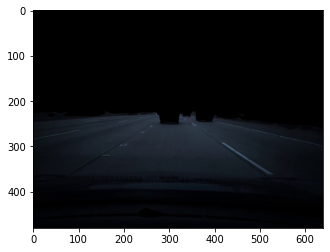

In [27]:
plt.imshow(train_frame)

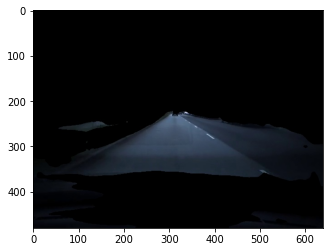

In [28]:
plt.imshow(val_frame)

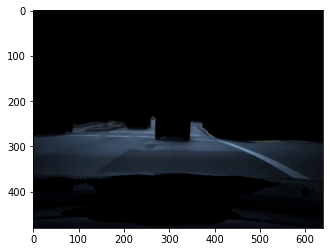

In [29]:
plt.imshow(holdout_frame)

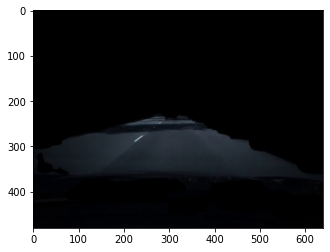

In [30]:
plt.imshow(test_frame)